
## Predicting CO2 Emissions of Vehicles Using Real-Time Telematics Data

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = pd.read_csv('data.csv', low_memory=False)

In [66]:
# Displaying the first few rows of the dataset
print(data.head())

# Basic information about data types and number of non-null values
print(data.info())

                     file  year manufacturer      model         description  \
0  DatapartC_july2000.csv  2000   Alfa Romeo  145 Range  1.6 Twin Spark 16v   
1  DatapartC_july2000.csv  2000   Alfa Romeo  145 Range  1.8 Twin Spark 16v   
2  DatapartC_july2000.csv  2000   Alfa Romeo  145 Range          Cloverleaf   
3  DatapartC_july2000.csv  2000   Alfa Romeo  146 Range  1.6 Twin Spark 16v   
4  DatapartC_july2000.csv  2000   Alfa Romeo  146 Range  1.8 Twin Spark 16v   

   euro_standard tax_band transmission transmission_type  engine_capacity  \
0              2      NaN           M5            Manual           1598.0   
1              2      NaN           M5            Manual           1747.0   
2              2      NaN           M5            Manual           1970.0   
3              2      NaN           M5            Manual           1598.0   
4              2      NaN           M5            Manual           1747.0   

   ... nox_emissions  thc_nox_emissions  particulates_emission

The collection contains fundamental vehicle data such "year," which refers to the car's production or release year, "manufacturer," which denotes the brand that made the vehicle, "model," which refers to the particular vehicle model, and "description," which offers additional information like engine size or unique characteristics. Additionally, data on compliance with European emission standards ('euro_standard') is included. These standards range from Euro 1 to Euro 6, with each standard denoting tighter emission controls, and are used to classify automobiles. With the growing emphasis on lowering car emissions, the 'euro_standard' is an essential component. 'transmission' (the kind of gearbox the car uses) and 'transmission_type' (a more general classification of transmission as manual, automatic, or semi-automatic) are two more important attributes.

Further, the dataset explores more specific details like 'engine_capacity,' which is the volume of the engine's cylinders, 'fuel_type,' which is the type of fuel the vehicle uses, and a number of metrics for evaluating fuel efficiency, such as 'urban_metric,' 'extra_urban_metric,' and 'combined_metric,' which represent fuel efficiency under various driving conditions, as well as their imperial equivalents, 'urban_imperial,' 'extra_urban_imperial,' and 'combined_imperial'. These fuel economy metrics are essential for comprehending how the car performs in different conditions. The dataset also contains other useful information for environmental assessments, such as 'noise_level' (the vehicle's operational noise) and a variety of emissions data, such as 'co2' (carbon dioxide emissions), 'thc_emissions' (total hydrocarbons), 'co_emissions' (carbon monoxide), 'nox_emissions' (nitrogen oxides), and 'particulates_emissions' (particulate matter emissions), all of which provide information on the vehicle's environmental impact.

Features like 'fuel_cost_12000_miles' and 'fuel_cost_6000_miles' (which estimate fuel costs for specified mileages) and'standard_12_months','standard_6_months', 'first_year_12_months', and 'first_year_6_months' (which represent taxation or registration-related costs) are examples of how the economic side of vehicle ownership is represented. When it comes to monitoring any changes or additions to a vehicle's specs or data inputs, the 'date_of_change' column is very helpful. Thus, this extensive dataset offers a wider perspective on the changes in emissions, efficiency, and operating costs throughout the automobile sector in addition to providing a thorough picture of specific vehicle features.

In [67]:
print(data.describe())

# Summary for categorical data
print(data.describe(include=['object']))

               year  euro_standard  engine_capacity  urban_metric  \
count  45511.000000   45511.000000     45504.000000  45498.000000   
mean    2007.316055       3.969282      2182.770526     10.472676   
std        3.832559       0.838025       899.100669      3.984944   
min     2000.000000       2.000000       209.000000      3.100000   
25%     2004.000000       3.000000      1598.000000      7.700000   
50%     2008.000000       4.000000      1988.000000      9.800000   
75%     2011.000000       5.000000      2429.000000     12.400000   
max     2013.000000       6.000000      8285.000000     41.200000   

       extra_urban_metric  combined_metric  urban_imperial  \
count        45498.000000     45504.000000    45498.000000   
mean             6.139602         7.721963       30.527557   
std              1.783382         2.503880       10.623745   
min              2.900000         1.200000        6.800000   
25%              4.900000         5.900000       22.800000   
50%   

The dataset offers an extensive and thorough overview of vehicle characteristics and performance indicators, with a primary focus on models from the early to late 2000s. The average year of the automobiles, based on data from 2000 to 2013, is 2007, suggesting a good representation of cars from this era. Including the European emission standards (Euro standard), which have an average value of about 4 and range from 2 to 6, is a crucial component of the dataset. This is a reflection of how regulations have changed throughout this period, becoming more stringent with regard to emissions. Because it directly pertains to vehicle compliance and environmental standards, the 'euro_standard' field is very significant.

The dataset offers an extensive and thorough overview of vehicle characteristics and performance indicators, with a primary focus on models from the early to late 2000s. The average year of the automobiles, based on data from 2000 to 2013, is 2007, suggesting a good representation of cars from this era. Including the European emission standards (Euro standard), which have an average value of about 4 and range from 2 to 6, is a crucial component of the dataset. This is a reflection of how regulations have changed throughout this period, becoming more stringent with regard to emissions. Because it directly pertains to vehicle compliance and environmental standards, the 'euro_standard' field is very significant.

The dataset contains a variety of metrics related to emissions, including 'co2', 'co_emissions', and 'nox_emissions'. These numbers' wide range points to a variety of cars with different effects on the environment. The operating noise measured by the 'noise_level' data contributes much more to the evaluation of these cars' environmental effect.

The dataset includes information on financial elements of car ownership in addition to technical performance. The fuel expenditure estimates provided by "fuel_cost_12000_miles" and "fuel_cost_6000_miles" take into account both the vehicles' short- and long-term fuel efficiency. Furthermore,'standard_12_months' and'standard_6_months' offer an insight into the expenses related to car registration or taxes.

As far as categorical data goes, the dataset is drawn from 32 distinct files, which suggests a thorough collecting procedure. It features 62 different automakers, Mercedes-Benz being the most commonly seen brand, exhibiting a diverse range of automakers. The '3 Series E90/E91/E92/E93' model appears most frequently among the 2,649 distinct models in the dataset, highlighting the range of vehicle types and models. There are 14,989 distinct items in the extensive and varied description database that provide comprehensive details on every car.

In [68]:
# Missing Values
missing_values = data.isnull().sum()
print(missing_values)

file                          0
year                          0
manufacturer                  0
model                         0
description                   0
euro_standard                 0
tax_band                  37674
transmission                 10
transmission_type           341
engine_capacity               7
fuel_type                     0
urban_metric                 13
extra_urban_metric           13
combined_metric               7
urban_imperial               13
extra_urban_imperial         13
combined_imperial             7
noise_level                   9
co2                           0
thc_emissions             22321
co_emissions                319
nox_emissions              5361
thc_nox_emissions         40081
particulates_emissions    30710
fuel_cost_12000_miles     12375
fuel_cost_6000_miles      33311
standard_12_months        41994
standard_6_months         42585
first_year_12_months      41994
first_year_6_months       44092
date_of_change            39297
dtype: i

Certain columns from the dataset needs to be removed. The decision is driven by a strategic approach to focus on the most relevant and reliable data for your research questions. Columns like 'thc_nox_emissions', 'particulates_emissions', 'thc_emissions', 'fuel_cost_6000_miles', 'fuel_cost_120000_miles', 'standard_12_months', 'standard_6_months', 'first_year_12_months', 'first_year_6_months', and 'date_of_change' are being removed due to their high amount of missing data. Such a significant level of missing values can compromise the integrity and accuracy of any analysis or model built using this data. Additionally, these columns do not directly contribute to the specific research goals focused on emissions, fuel efficiency, and vehicle specifications. Furthermore, the removal of 'urban_metric', 'extra_urban_metric', and 'combined_metric' in favor of their imperial counterparts is based on the prevalence of the imperial system in the dataset's context, ensuring consistency and relevance in fuel efficiency measurements. Lastly, columns like 'tax_band' and 'date_of_change' are being excluded due to their mixed data types or unclear data, which could complicate the analysis process without adding significant value.

In [69]:
final_columns = [
    'year', 'manufacturer', 'model', 'euro_standard', 'transmission',
    'transmission_type', 'engine_capacity', 'fuel_type', 'urban_imperial',
    'extra_urban_imperial', 'combined_imperial', 'noise_level',
    'co2', 'co_emissions', 'nox_emissions'
]

# Retaining only the final columns in the dataset
data_final = data[final_columns]
print(data_final.head())

# saving the updated csv file
data_final.to_csv('cleaned_dataset.csv', index=False)

   year manufacturer      model  euro_standard transmission transmission_type  \
0  2000   Alfa Romeo  145 Range              2           M5            Manual   
1  2000   Alfa Romeo  145 Range              2           M5            Manual   
2  2000   Alfa Romeo  145 Range              2           M5            Manual   
3  2000   Alfa Romeo  146 Range              2           M5            Manual   
4  2000   Alfa Romeo  146 Range              2           M5            Manual   

   engine_capacity fuel_type  urban_imperial  extra_urban_imperial  \
0           1598.0    Petrol            25.4                  43.5   
1           1747.0    Petrol            24.6                  42.8   
2           1970.0    Petrol            22.8                  42.8   
3           1598.0    Petrol            25.0                  42.8   
4           1747.0    Petrol            24.6                  42.8   

   combined_imperial  noise_level  co2  co_emissions  nox_emissions  
0               34.4  

In [70]:
missing_values = data_final.isnull().sum()
print("Shape of the dataframe:", data_final.shape)
print("Number of missing values in each column:")
print(missing_values)

Shape of the dataframe: (45511, 15)
Number of missing values in each column:
year                       0
manufacturer               0
model                      0
euro_standard              0
transmission              10
transmission_type        341
engine_capacity            7
fuel_type                  0
urban_imperial            13
extra_urban_imperial      13
combined_imperial          7
noise_level                9
co2                        0
co_emissions             319
nox_emissions           5361
dtype: int64


## Handling missing values

In [71]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_dataset.csv')

# Defining the columns that we are going to process for missing values
numerical_cols_with_few_nans = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial',
                                'combined_imperial', 'noise_level', 'co_emissions']
categorical_cols_with_few_nans = ['transmission', 'transmission_type']
significant_missing_col = 'nox_emissions'

# Imputing numerical columns with few missing values using median
i = 0
while i < len(numerical_cols_with_few_nans):
    col = numerical_cols_with_few_nans[i]
    data[col].fillna(data[col].median(), inplace=True)
    i += 1

# Imputing categorical columns with few missing values using mode
i = 0
while i < len(categorical_cols_with_few_nans):
    col = categorical_cols_with_few_nans[i]
    data[col].fillna(data[col].mode()[0], inplace=True)
    i += 1

# For 'nox_emissions' with a large number of missing values,  median imputation will be used
data[significant_missing_col].fillna(data[significant_missing_col].median(), inplace=True)

# Confirming that there are no more missing values
missing_values_after = data.isnull().sum()
print(missing_values_after)
# Saving the csv file after imputation
data.to_csv('cleaned_dataset_imputed.csv', index=False)


year                    0
manufacturer            0
model                   0
euro_standard           0
transmission            0
transmission_type       0
engine_capacity         0
fuel_type               0
urban_imperial          0
extra_urban_imperial    0
combined_imperial       0
noise_level             0
co2                     0
co_emissions            0
nox_emissions           0
dtype: int64


Missing values for numerical columns have been filled by using the column's median value. This method is resistant to outliers and skewness in the data. As is typical with categorical imputation, missing values for categorical columns are replaced with the most prevalent value, or mode.The median is also imputed to the 'nox_emissions' column, which has a high number of missing values.

In [72]:
print(data.shape)
print(data.head())

(45511, 15)
   year manufacturer      model  euro_standard transmission transmission_type  \
0  2000   Alfa Romeo  145 Range              2           M5            Manual   
1  2000   Alfa Romeo  145 Range              2           M5            Manual   
2  2000   Alfa Romeo  145 Range              2           M5            Manual   
3  2000   Alfa Romeo  146 Range              2           M5            Manual   
4  2000   Alfa Romeo  146 Range              2           M5            Manual   

   engine_capacity fuel_type  urban_imperial  extra_urban_imperial  \
0           1598.0    Petrol            25.4                  43.5   
1           1747.0    Petrol            24.6                  42.8   
2           1970.0    Petrol            22.8                  42.8   
3           1598.0    Petrol            25.0                  42.8   
4           1747.0    Petrol            24.6                  42.8   

   combined_imperial  noise_level  co2  co_emissions  nox_emissions  
0         

So, first we took data.csv file. Then removed some columns saved it as cleaned_dataset.cvs. Finally we imputed the missing values in cleaned_dataset.csv and saved it as cleaned_dataset_imputed. So, cleaned_dataset_imputed.csv file is the final  dataset that we used for the project

## Visualizations on the cleaned_dataset_imputed.csv file

### Histogram of Engine Capacity

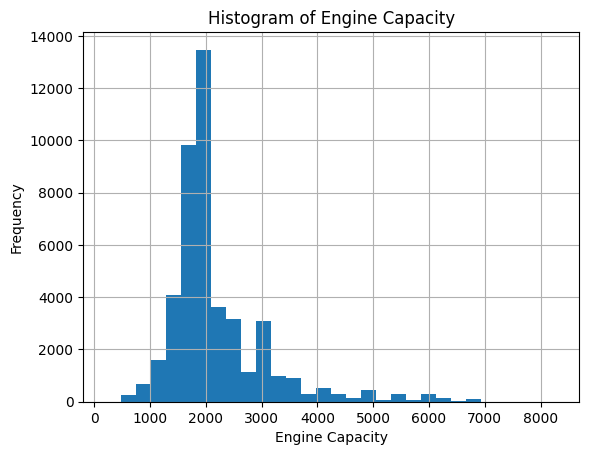

In [73]:
data['engine_capacity'].hist(bins=30)
plt.title('Histogram of Engine Capacity')
plt.xlabel('Engine Capacity')
plt.ylabel('Frequency')
plt.show()


The histogram to illustrates the distribution of engine capacities across a set of vehicles. It shows that the engine capacity data is right-skewed, meaning most vehicles have smaller engines, and fewer vehicles have larger engines. The most frequent engine capacities are under 2000 cc, indicating a predominance of compact and mid-sized cars in the dataset. As engine capacity increases, the number of vehicles decreases, which is visible from the diminishing height of the bars on the right side of the histogram. There's also a noticeable presence of vehicles with engine capacities greater than 5000 cc, though these are uncommon and might represent more specialized vehicles like heavy-duty trucks or high-performance sports cars. Overall, the histogram reflects a diverse range of engine sizes, with a significant skew towards smaller, more economical engines.

### Histogram of co2

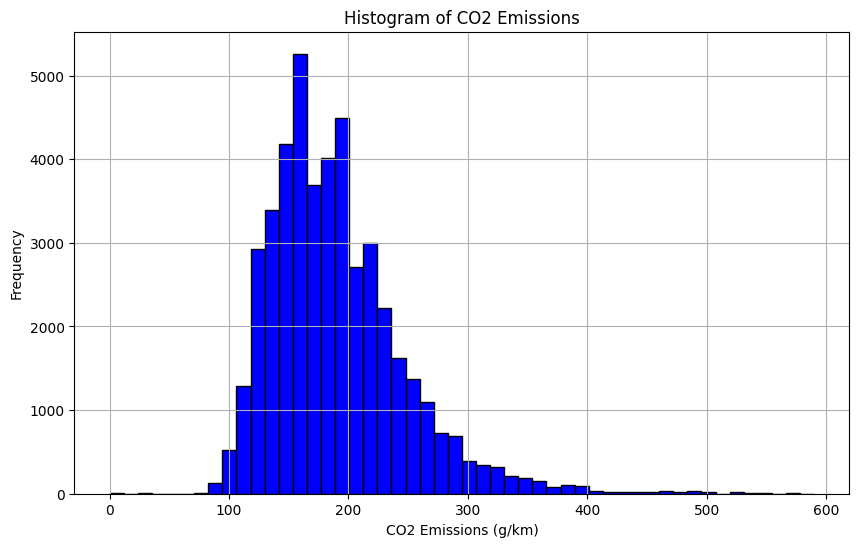

In [74]:
# Plotting the histogram for CO2 emissions
plt.figure(figsize=(10, 6))
plt.hist(data['co2'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The histogram visualizes the distribution of CO2 emissions across the dataset. This graph is right-skewed, showing that a large number of vehicles have lower CO2 emissions, with a peak in frequency for vehicles emitting CO2 in the range below 200 grams per kilometer. The distribution reveals that as CO2 emissions increase, the number of vehicles decreases—the tail of the distribution extends toward higher emissions, but such vehicles are less common. The presence of vehicles with emissions over 400 grams per kilometer is notably sparse, which might suggest that these are high-performance or older models that are less efficient in terms of emissions. The overall shape of the histogram indicates that the dataset primarily consists of vehicles with lower CO2 emissions, aligning with modern fuel efficiency standards and environmental regulations that encourage or enforce lower emissions.

### Histogram of NOx emissions

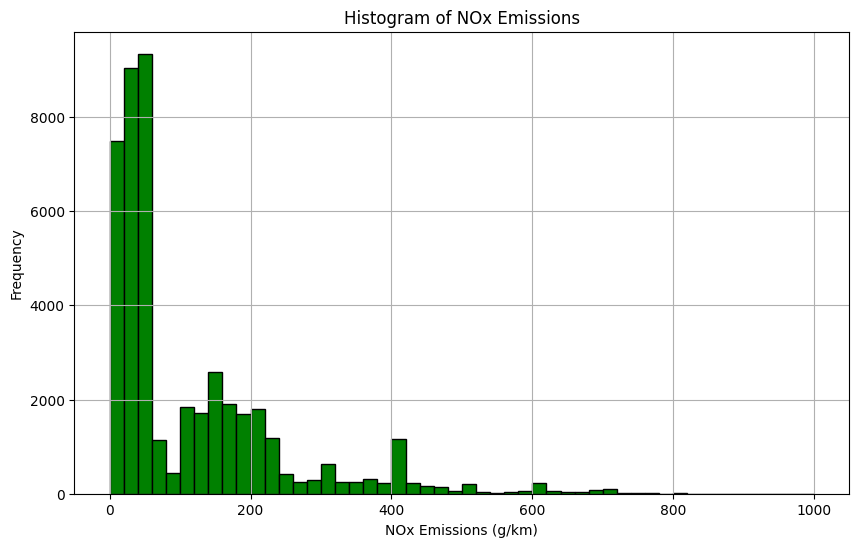

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(data['nox_emissions'].dropna(), bins=50, color='green', edgecolor='black', range=(0, 1000)) # Limiting range to 0-1000 g/km
plt.title('Histogram of NOx Emissions')
plt.xlabel('NOx Emissions (g/km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram visualizes the distribution of NOx emissions in the dataset, with the x-axis representing NOx emissions in grams per kilometer and the y-axis showing the frequency of vehicles within various emission ranges. The data shows a right-skewed distribution, where a high frequency of vehicles have low NOx emissions, particularly concentrated at the lower end of the scale. As the NOx emissions increase, the frequency of vehicles drastically decreases, which indicates that higher NOx emissions are much less common in this dataset. The sharp peak near the lower end suggests that most vehicles have emissions well under 200 g/km, aligning with stricter environmental standards. Conversely, the long tail with fewer vehicles towards the higher end of the NOx emission spectrum suggests the presence of some vehicles with significantly higher emissions, which could potentially include older models or those with larger engines. This distribution pattern underscores the emphasis on lower emissions in newer vehicle designs or regulations that target reductions in NOx emissions.

### Histogram for co emission

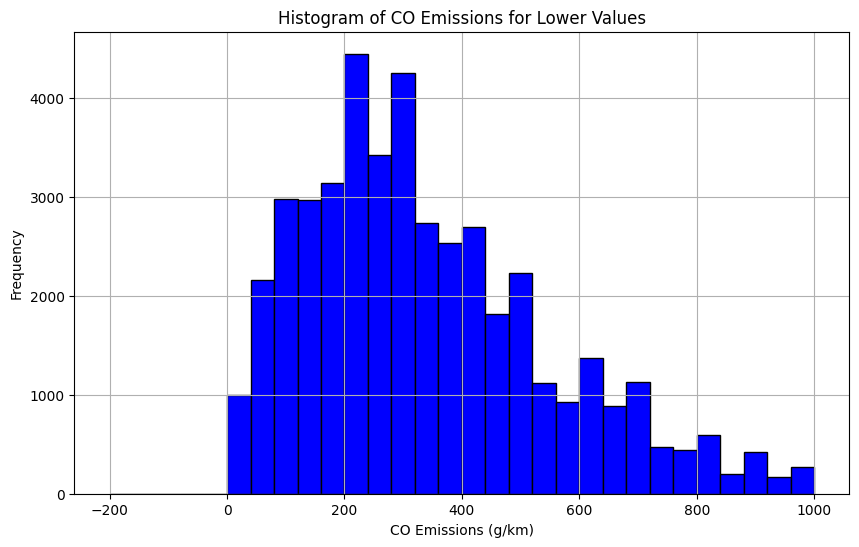

In [76]:
# Filter the 'co_emissions' column to focus on the lower values
lower_co_emissions = data['co_emissions'][data['co_emissions'] <= 1000]
plt.figure(figsize=(10, 6))
plt.hist(lower_co_emissions, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of CO Emissions for Lower Values')
plt.xlabel('CO Emissions (g/km)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram displays the frequency distribution of CO (carbon monoxide) emissions across a range of vehicles for lower emission values, specifically between 0 to 1000 grams per kilometer (g/km). The chart indicates that the data is skewed to the right, with a higher concentration of vehicles in the lower emissions bracket. The tallest bars, representing the most common CO emission values, fall within the lower end of the range, suggesting that many vehicles have relatively low CO emissions.

### Histogram for noise level

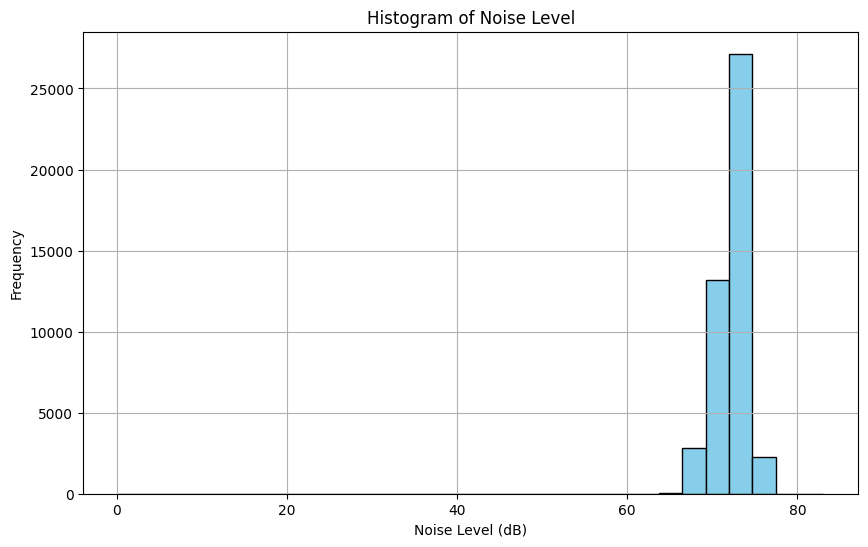

In [77]:
plt.figure(figsize=(10, 6))
plt.hist(data['noise_level'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Noise Level')
plt.xlabel('Noise Level (dB)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution appears to be unimodal, with the highest frequency centered around the 60 dB mark. The bars to the left and right of this peak are significantly shorter, indicating that fewer vehicles have lower or higher noise levels compared to the central peak. There are very few vehicles with noise levels below 40 dB or above 80 dB, making these ranges relatively rare occurrences in the dataset.

### Bar charts on Categorical columns( manufacturer, fuel_type)

/tmp/ipykernel_132857/3273981254.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=manufacturer_counts.index, x=manufacturer_counts.values, palette="viridis")


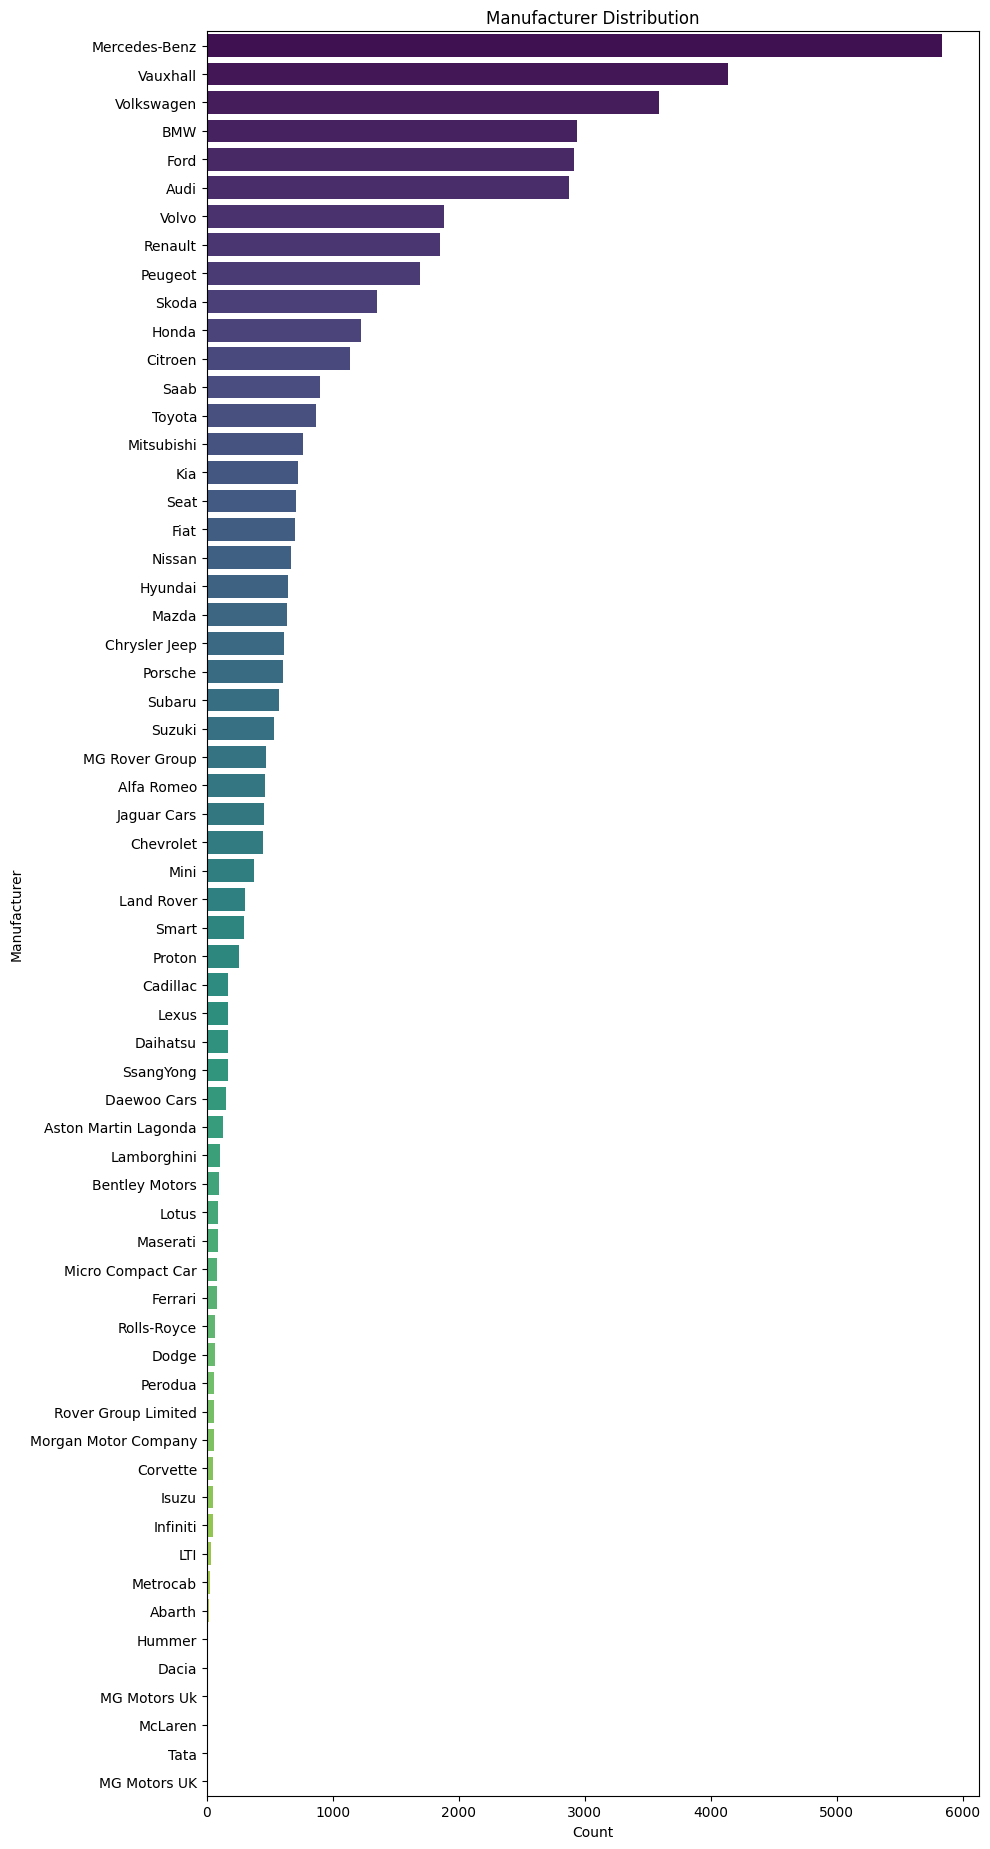

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Counting the occurrences of each manufacturer
manufacturer_counts = data['manufacturer'].value_counts()

# Horizontal bar plot
plt.figure(figsize=(10, max(15, len(manufacturer_counts) * 0.3)))  # Dynamic height based on number of manufacturers
sns.barplot(y=manufacturer_counts.index, x=manufacturer_counts.values, palette="viridis")

# Title and labels
plt.title('Manufacturer Distribution')
plt.xlabel('Count')
plt.ylabel('Manufacturer')

# Rotate the y-axis labels to prevent overlap
plt.yticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()


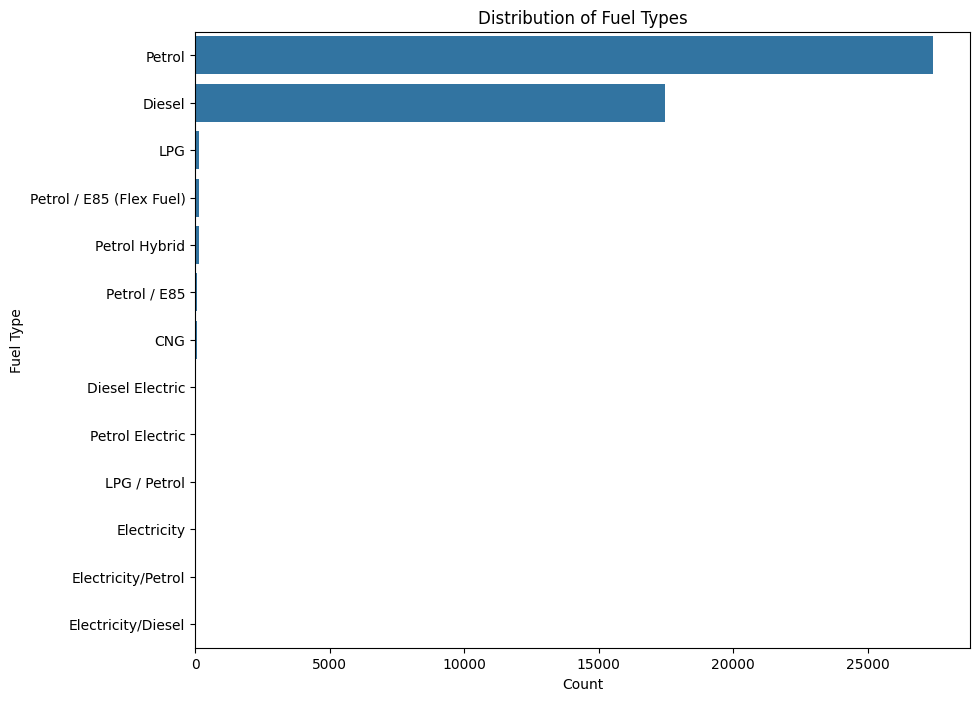

In [79]:
plt.figure(figsize=(10, 8))
sns.countplot(y='fuel_type', data=data, order = data['fuel_type'].value_counts().index)
plt.title('Distribution of Fuel Types')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

The bar chart provides an overview of the distribution of fuel types among vehicles in the dataset. It is apparent that 'Petrol' is the predominant fuel type, followed by 'Diesel', which also represents a substantial portion of the dataset. Other fuel types such as 'LPG', 'Petrol/E85 (Flex Fuel)', and various hybrid and electric combinations are present but in significantly smaller numbers. The 'Petrol Hybrid' and 'Diesel Electric' categories suggest the inclusion of more environmentally friendly vehicles, although they constitute a much smaller fraction compared to traditional fuel types. The diversity of fuel types reflects the range of vehicle technologies and fuel options in the dataset, from conventional combustion engines to more modern and alternative energy vehicles. This distribution is essential for understanding the potential environmental impact and the evolution of vehicle fuel technologies within the dataset's context.

### Scatter plot of co2 over years

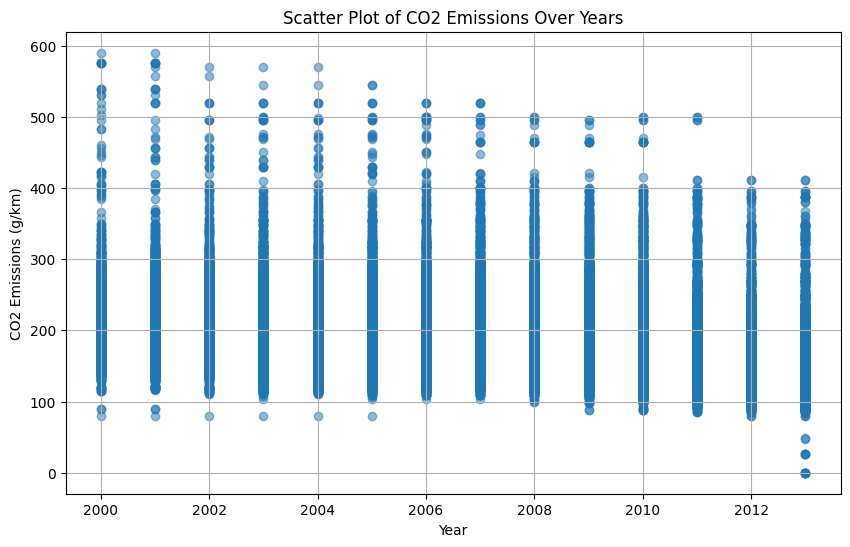

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(data['year'], data['co2'], alpha=0.5)
plt.title('Scatter Plot of CO2 Emissions Over Years')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()

The distribution of points across the years does not show a clear trend in CO2 emissions reduction or increase over time. Instead, there is a wide range of emissions for each year, as indicated by the vertical spread of points. This could suggest that while some newer vehicles have lower emissions, the overall decrease in emissions over time is not uniform, and high-emission vehicles are still being produced or are in use. The plot also shows a significant number of vehicles with CO2 emissions clustered in the lower range, especially in later years, which may indicate advancements in vehicle technology and tighter environmental regulations. However, the presence of vehicles with higher emissions across all years suggests that there are still many vehicles on the road that are not as environmentally friendly.

### Histograms for urban_imperial,extra_urban_imperial,combined_imperial

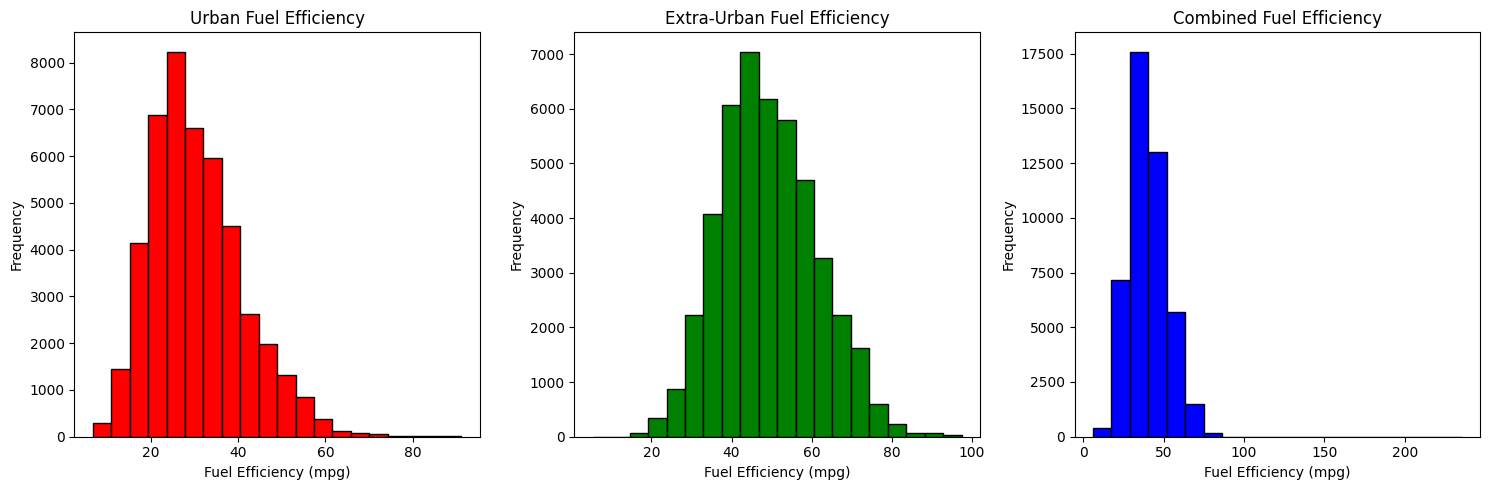

In [81]:
plt.figure(figsize=(15, 5))

# Histogram for urban_imperial
plt.subplot(1, 3, 1)
plt.hist(data['urban_imperial'].dropna(), bins=20, color='red', edgecolor='black')
plt.title('Urban Fuel Efficiency')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')

# Histogram for extra_urban_imperial
plt.subplot(1, 3, 2)
plt.hist(data['extra_urban_imperial'].dropna(), bins=20, color='green', edgecolor='black')
plt.title('Extra-Urban Fuel Efficiency')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')

# Histogram for combined_imperial
plt.subplot(1, 3, 3)
plt.hist(data['combined_imperial'].dropna(), bins=20, color='blue', edgecolor='black')
plt.title('Combined Fuel Efficiency')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The first histogram, in red, shows 'Urban Fuel Efficiency'. It indicates that most vehicles have lower fuel efficiency in urban settings, with the majority of values clustered between 20 and 40 mpg. This is likely due to frequent stops and starts in city driving, which tends to decrease fuel economy.

The second histogram, in green, represents 'Extra-Urban Fuel Efficiency'. The distribution here is more towards the higher mpg values, peaking between 40 and 60 mpg. This suggests that vehicles are more fuel-efficient in extra-urban conditions, such as on highways, where driving is more constant and involves fewer stops.

The third histogram, in blue, for 'Combined Fuel Efficiency', shows a composite distribution of urban and extra-urban driving conditions. The peak of this histogram is broader and shifted towards a higher mpg compared to the urban-only histogram, suggesting better overall efficiency but still less than extra-urban driving. The spread of the combined fuel efficiency is wide, indicating a diverse range of vehicle performances under general driving conditions.


### Histogram for euro_standard

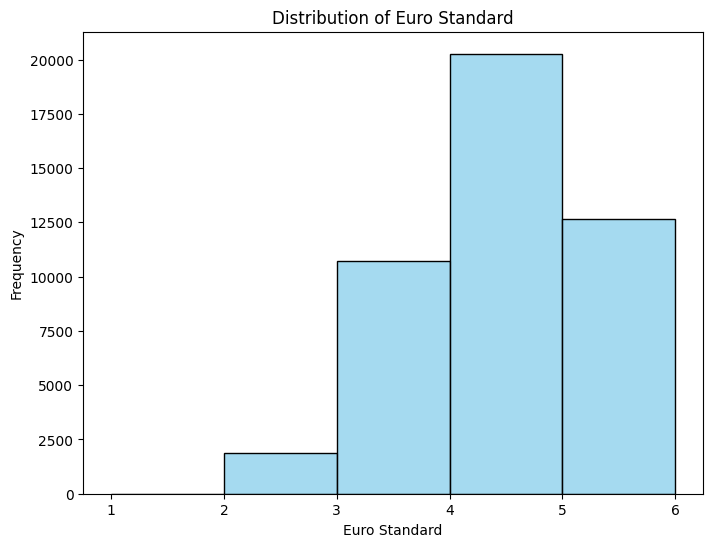

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(data['euro_standard'].dropna(), kde=False, bins=range(1, data['euro_standard'].max() + 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Euro Standard')
plt.xlabel('Euro Standard')
plt.ylabel('Frequency')
plt.xticks(range(1, data['euro_standard'].max() + 1))
plt.show()

The histogram represents the distribution of the Euro emission standards across a dataset of vehicles. Each bar corresponds to one of the Euro standards, ranging from Euro 1 to Euro 6, and the height of the bar indicates the frequency of vehicles that comply with each standard.

From this histogram, we can observe that Euro 4 has the highest frequency, suggesting that a large proportion of vehicles in the dataset meet the Euro 4 emission requirements. This could indicate that the dataset contains many vehicles manufactured around the time when Euro 4 standards were actively enforced. The lower frequencies of Euro 1 and Euro 2 standards imply that fewer vehicles in the dataset adhere to these older emission standards, which could be due to the phasing out of older vehicles or a preference for newer, cleaner vehicles. Euro 5 and Euro 6 standards have moderate frequencies, potentially reflecting the transition to more stringent emission standards in more recent years.

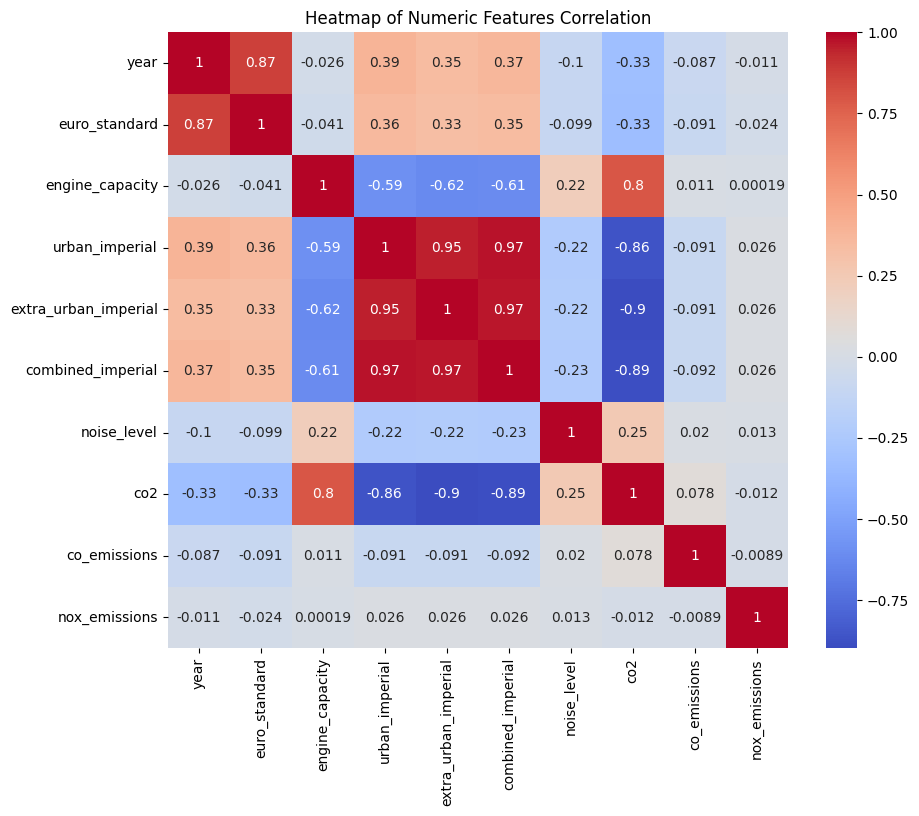

Relevant features to 'co2':
year: -0.3274261117745865
euro_standard: -0.32891277813899233
engine_capacity: 0.7974380700444185
urban_imperial: -0.8614465787106085
extra_urban_imperial: -0.8985201174445209
combined_imperial: -0.8853666093484971
noise_level: 0.2518440587872057

Highly correlated pairs of features:
('year', 'euro_standard')
('urban_imperial', 'extra_urban_imperial')
('urban_imperial', 'combined_imperial')
('urban_imperial', 'co2')
('extra_urban_imperial', 'combined_imperial')
('extra_urban_imperial', 'co2')
('combined_imperial', 'co2')


In [83]:
#Select numeric columns only for correlation analysis
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Numeric Features Correlation')
plt.show()

# Initialize variables for relevant features and multicollinearity checks
relevant_to_target = {}
highly_correlated_pairs = []
i = 0
while i < len(numeric_cols):
    col = numeric_cols[i]
    if col != 'co2':
        corr_with_target = correlation_matrix.at[col, 'co2']
        if abs(corr_with_target) > 0.1:  # Choose a threshold for relevance
            relevant_to_target[col] = corr_with_target
    i += 1
i = 0
while i < len(numeric_cols):
    j = i + 1
    while j < len(numeric_cols):
        col_i, col_j = numeric_cols[i], numeric_cols[j]
        if abs(correlation_matrix.at[col_i, col_j]) > 0.8:  # Choose a threshold for multicollinearity
            highly_correlated_pairs.append((col_i, col_j))
        j += 1
    i += 1

# Printing the results
print("Relevant features to 'co2':")
for feature, corr_value in relevant_to_target.items():
    print(f"{feature}: {corr_value}")

print("\nHighly correlated pairs of features:")
for pair in highly_correlated_pairs:
    print(pair)

The heatmap visualizes the correlation matrix of numeric features in a dataset, which quantifies the linear relationship between pairs of features. In this matrix, the color intensity reflects the strength and direction of the correlation. Red tones indicate a positive correlation, where the values of one feature increase with the values of another, while blue tones suggest a negative correlation, indicating an inverse relationship.

From the heatmap, we can deduce several key insights. For example, there's a strong positive correlation between 'urban_imperial', 'extra_urban_imperial', and 'combined_imperial' suggesting that vehicles with higher fuel efficiency in urban settings tend to also be more efficient in extra-urban and overall conditions. The 'euro_standard' also shows a notable positive correlation with 'year', indicating that newer vehicles tend to comply with more stringent emission standards. On the other hand, 'co2' has a high negative correlation with 'urban_imperial', 'extra_urban_imperial', and 'combined_imperial', which means that as fuel efficiency improves, CO2 emissions tend to decrease.

The section below the heatmap provides further detail. The list of relevant features to 'co2' shows 'combined_imperial', 'extra_urban_imperial', and 'urban_imperial' as having the strongest negative correlations, meaning they are inversely related to CO2 emissions and are likely important predictors. The high correlation values close to -0.9 suggest a very strong inverse relationship.

Our decision not to remove correlated columns prior to modeling was intentional and grounded in several considerations. We recognized that multicollinearity chiefly affects the interpretability of linear models by increasing the variance of coefficient estimates. However, it does not necessarily impair the predictive accuracy of a model. Given that our primary goal was to maximize prediction accuracy rather than interpret the coefficients of each variable, we decided to retain all columns. This was especially pertinent since our model selection included algorithms such as Decision Trees, Random Forests, and Neural Networks, which are robust to multicollinearity. These models can handle correlated features without a loss in performance and can actually benefit from the additional context that seemingly redundant predictors provide.

Furthermore, our decision to retain all correlated features, rather than selecting a single representative column, was influenced by the nuances and potential unique contributions each feature could offer to the model's predictive capacity. Even within highly correlated variables, subtle differences can inform more complex models in ways that might not be immediately apparent but could improve model generalization.

# Machine Learning

# Machine learning algorithms we used for regression tasks include:

1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regression
4. Support Vector Regression
5. K-Nearest Neighbors Regression
6. Gradient Boosting Regression
7. AdaBoost Regression
8. Neural Network Regression (Multilayer Perceptron)
9. Gaussian Process Regression
10. Bayesian Regression

In [84]:
# Load the dataset
df = pd.read_csv('cleaned_dataset_imputed.csv')

In [85]:
# from google.colab import drive

# # Access the file
# file_path = '/content/drive/MyDrive/Colab Notebooks/cleaned_dataset_imputed.csv'

# import numpy as np
# import pandas as pd

# df = pd.read_csv(file_path) # Reading the csv source␣ , →file as a dataframe
df.shape

(45511, 15)

In [86]:
# data = pd.read_csv('your_dataset.csv')

# 2. Once the dataset is loaded, you can print the columns using the `columns` attribute. This will display a list of the column names in the dataset:

print(df.columns)

Index(['year', 'manufacturer', 'model', 'euro_standard', 'transmission',
       'transmission_type', 'engine_capacity', 'fuel_type', 'urban_imperial',
       'extra_urban_imperial', 'combined_imperial', 'noise_level', 'co2',
       'co_emissions', 'nox_emissions'],
      dtype='object')


In [87]:
numerical_cols_with_few_nans = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial',
                                'combined_imperial', 'noise_level']

In [88]:
# I have values of different scales make all of them in the range of 0 to 1

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Select the columns you want to scale
columns_to_scale = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial',
                                'combined_imperial', 'noise_level']

# Initializing  the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Print the updated dataframe
print(df.head())

   year manufacturer      model  euro_standard transmission transmission_type  \
0  2000   Alfa Romeo  145 Range              2           M5            Manual   
1  2000   Alfa Romeo  145 Range              2           M5            Manual   
2  2000   Alfa Romeo  145 Range              2           M5            Manual   
3  2000   Alfa Romeo  146 Range              2           M5            Manual   
4  2000   Alfa Romeo  146 Range              2           M5            Manual   

   engine_capacity fuel_type  urban_imperial  extra_urban_imperial  \
0         0.171991    Petrol        0.220641              0.414130   
1         0.190441    Petrol        0.211151              0.406522   
2         0.218053    Petrol        0.189798              0.406522   
3         0.171991    Petrol        0.215896              0.406522   
4         0.190441    Petrol        0.211151              0.406522   

   combined_imperial  noise_level  co2  co_emissions  nox_emissions  
0           0.124183  

# Firstly we use only 5 numerical column In the next section we use a combination of categorical and numerical values

# LinearRegression

In [89]:
# Defining the features and the target of the model

features = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial', 'combined_imperial', 'noise_level']
target = ['co2']


X = df[features].values         # Features
y = df[target].values.ravel()          # Target

The linear model is now $y = \omega_1 X_1 + \omega_2 X_2 + \omega_0$, where $X_1$ and $X_2$ refer to <b>features</b> X_1 is <b>engine_capacity</b>, X_2 is <b>urban_imperial</b> respectively. $\omega_1$ and $\omega_2$ are the coefficients of regression, and the constant $\omega_0$ is the intercept (*i.e.* bias term).

In [90]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Performing Regression through scikit-learn

In a CO2 Emissions project, linear regression means creating a model that shows a straight line between predictor factors (things like engine size, fuel  economy in cities and highways, etc.) and the goal variable, which is the amount of CO2 emissions. With the given information and the assumption of a straight relationship, the model tries to guess how much CO2 will be released. To train the model, you have to find the best estimates for the linear equation. Once it is trained, you can use it to make forecasts based on new data, which gives you more information about the factors that affect CO2 emissions in that situation.



In [91]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression

# Instantiate linear regression
reg = LinearRegression()

# Fit the train data
reg.fit(X_train, y_train)

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train data

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9029 

Coefficients of Linear Model: [ 195.13195751   13.37488079 -206.83807635 -228.53874686   60.62213206] 

Intercept: 217.82864040008155


In [92]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Finding the predictions of the model for test dataset
y_pred = reg.predict(X_test)

print(y_pred[:10])  # Representing the price prediction for the first 10 data points in test dataset
# or drag a file here
# Evaluating the performance of the model on the test dataset
r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for train
print('\nR^2 score for test dataset = ', round(r2_test_score, 4))

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', round(mae,4))

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('\nMean Squared Error:', round(mse,4))

[241.29302112 228.99338025 360.97488162 177.58352952 278.49904077
 135.33892047 231.75547202 333.92199966 300.27027561 168.05388885]

R^2 score for test dataset =  0.8997

Mean Absolute Error: 11.3049

Mean Squared Error: 324.7142


The very small variance between the r2 score of the training set (0.9029) and the test set (0.8997) indicates excellent consistency and generalization from training to unseen data. Typically, multicollinearity is a concern in linear regression because it can inflate the variance of coefficient estimates, which affects interpretability, not prediction accuracy. Despite this, the high r2scores here suggest that multicollinearity has not compromised the model's predictive performance. This outcome implies that while the predictors may be inter-correlated, they work together well to capture the variance in the target variable. However, the stability of the model coefficients might be questionable due to multicollinearity; if the model or data were altered, the coefficients for the predictors could change more than they would in a model without multicollinearity. The correlation between predictors makes it challenging to parse out the unique contribution of each variable, but the collective predictive power remains strong

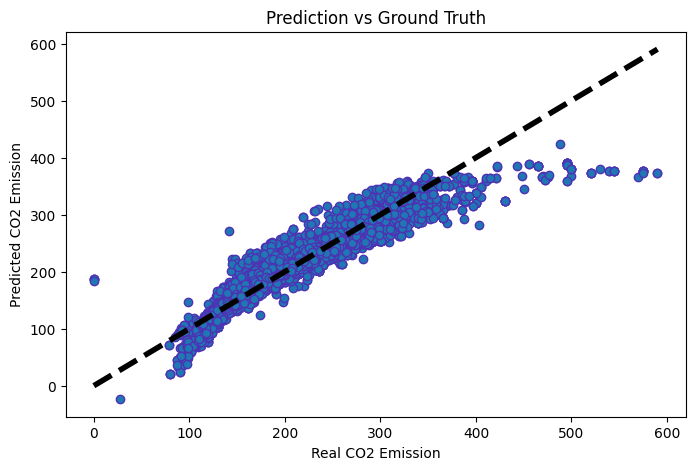

In [93]:
import matplotlib.pyplot as plt

# Let's plot predictions vs ground truth for 'co2'

fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot for predictions vs truth
ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))

# Draw line y=x
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Real CO2 Emission')
ax.set_ylabel('Predicted CO2 Emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

## $\color{ForestGreen}{\text{Visualizing the Effects of Lasso(L1) and Ridge(L2) Regularization on CO2 Emission Prediction}}$


R^2 score for test dataset L1 =  0.8978

R^2 score for test dataset L2 =  0.8997

Mean Absolute Error for test dataset L1: 11.3351

Mean Absolute Error for test dataset L2: 11.3042

Mean Squared Error for test dataset L1: 330.6377

Mean Squared Error for test dataset L2: 324.7119


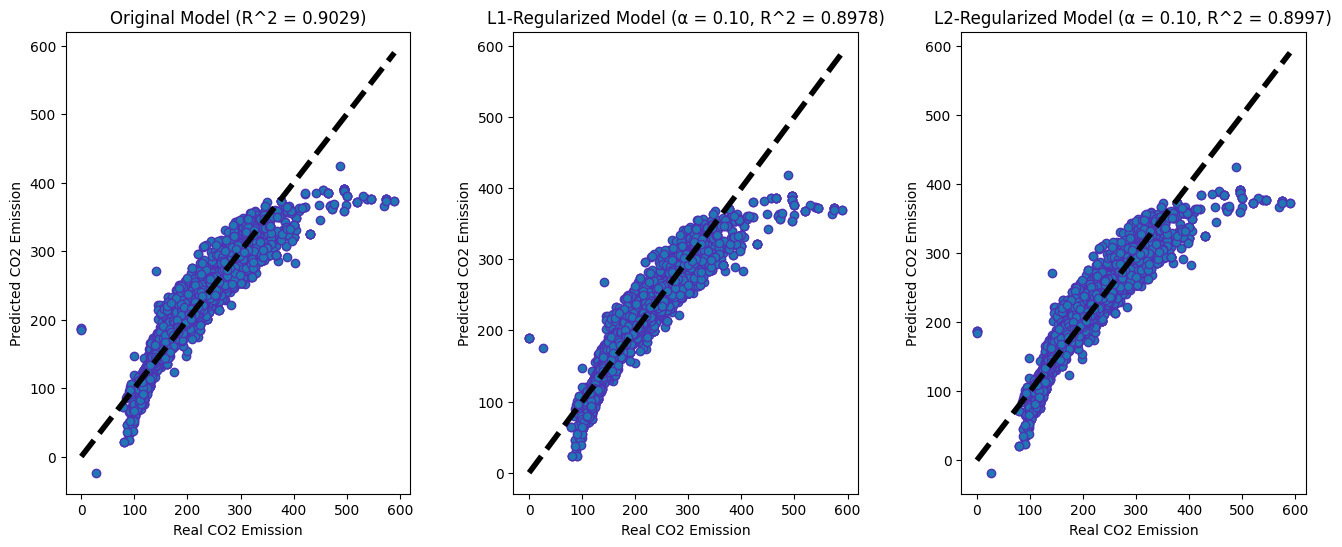

In [94]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Define regularization parameters
alpha_l1 = 0.1
alpha_l2 = 0.1

# Fit L1-regularized model
reg_l1 = Lasso(alpha=alpha_l1)
reg_l1.fit(X_train, y_train)

# Fit L2-regularized model
reg_l2 = Ridge(alpha=alpha_l2)
reg_l2.fit(X_train, y_train)

# Predict CO2 emission for test data
y_pred_l1 = reg_l1.predict(X_test)
y_pred_l2 = reg_l2.predict(X_test)

# Calculate R^2 scores for L1 and L2 models
r2_l1 = reg_l1.score(X_test, y_test)
r2_l2 = reg_l2.score(X_test, y_test)

# Evaluate the performance using Mean Absolute Error for L1 and L2 models
mae_l1 = mean_absolute_error(y_test, y_pred_l1)
mae_l2 = mean_absolute_error(y_test, y_pred_l2)

# Evaluate the performance using Mean Squared Error
mse_l1 = mean_squared_error(y_test, y_pred_l1)
mse_l2 = mean_squared_error(y_test, y_pred_l2)

print('\nR^2 score for test dataset L1 = ', round(r2_l1, 4))
print('\nR^2 score for test dataset L2 = ', round(r2_l2, 4))

print('\nMean Absolute Error for test dataset L1:', round(mae_l1,4))
print('\nMean Absolute Error for test dataset L2:', round(mae_l2,4))

print('\nMean Squared Error for test dataset L1:', round(mse_l1,4))
print('\nMean Squared Error for test dataset L2:', round(mse_l2,4))

plt.figure(figsize=(16, 6))

# Plot original model predictions
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Original Model (R^2 = %.4f)' % r2_train_score)
plt.xlabel('Real CO2 Emission')
plt.ylabel('Predicted CO2 Emission')

# Plot L1-regularized model predictions
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_l1, edgecolors=(0.3, 0.2, 0.7))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('L1-Regularized Model (α = %.2f, R^2 = %.4f)' % (alpha_l1, r2_l1))
plt.xlabel('Real CO2 Emission')
plt.ylabel('Predicted CO2 Emission')

# Plot L2-regularized model predictions
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_l2, edgecolors=(0.3, 0.2, 0.7))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('L2-Regularized Model (α = %.2f, R^2 = %.4f)' % (alpha_l2, r2_l2))
plt.xlabel('Real CO2 Emission')
plt.ylabel('Predicted CO2 Emission')

plt.subplots_adjust(wspace=0.3)
plt.show()


The close r2 scores suggest that for this dataset, both the sparsity induced by L1 and the shrinkage by L2 have a similar impact on the model's ability to predict unseen data. This outcome implies that the dataset may not have many irrelevant features, or that both sets of features selected by L1 and shrunk by L2 are equally important for making predictions. It also means that multicollinearity might not be significantly biasing the predictions, as L2's method of dealing with it seems to be just as effective as L1's feature elimination approach in this case.

# Decision Tree Regression
Machine learning algorithm Decision Tree Regression predicts continuous values, making it suited for regression problems like CO2 emissions. The technique creates a tree-like structure by iteratively partitioning data by feature criteria. Each tree leaf node predicts the target variable (e.g., CO2 emissions). After learning patterns in the training data, the decision tree predicts CO2 emissions by traversing the tree to a leaf node. Interpretable decision trees can capture non-linear correlations, making them suitable for regression problems in environmental modeling, including CO2 emission prediction.

In [95]:
# Constructing a tree regressor with no specified hyperparameters

from sklearn import tree

# Instantiate Decision Tree Regressor
tr_reg = tree.DecisionTreeRegressor(max_depth=3)   # You can adjust max_depth for control over the tree depth

# Fit the train data
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [96]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [97]:
from sklearn.metrics import mean_absolute_error

r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)


R^2 score for train dataset =  0.9266 

R^2 score for test dataset =  0.9231 

Mean Squared Error: 248.92870110416234

Mean Absolute Error: 11.165401627998891


The results from the Decision Tree Regression model indicate a strong performance on both the training and testing datasets, with r2 scores of 0.9266 and 0.9231, respectively. These scores are very close, suggesting that the model is generalizing well and not overfitting to the training data. Overfitting is a common problem with decision trees, as they can grow complex and fit the noise in the training data, but the similar r2 values here indicate that this is not occurring. r2 score of over 0.92 on both datasets is an indication of high predictive accuracy, showing that the model explains over 92% of the variance in CO2 emissions from the features it used. This level of performance is quite impressive for real-world datasets, which are often noisy and exhibit complex relationships.

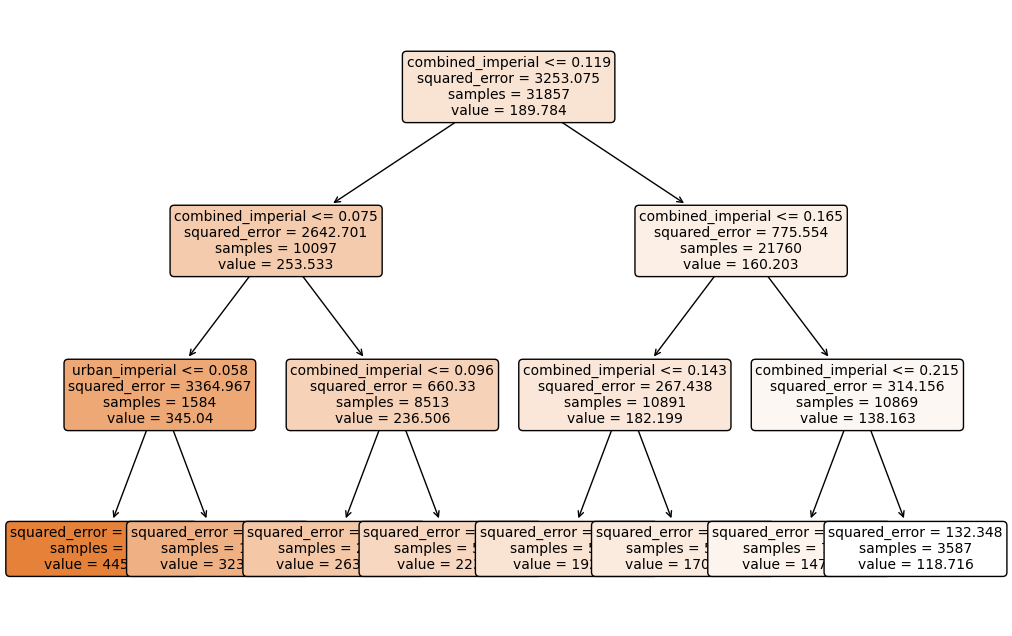

In [98]:
# Visualize the Decision Tree (optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tr_reg, filled=True, feature_names=features, rounded=True, fontsize=10)
plt.show()

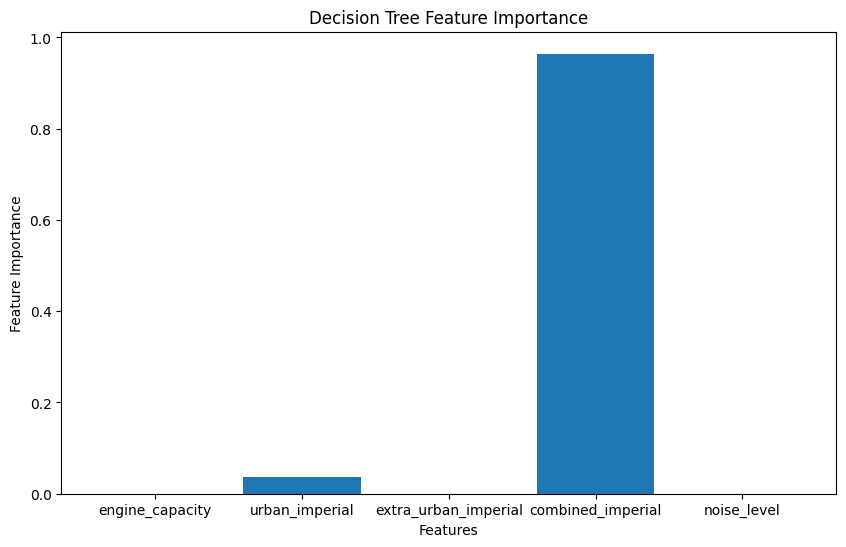

In [99]:
importances = tr_reg.feature_importances_
# Shows which features are more influential in making predictions.
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

## $\color{ForestGreen}{\text{Bagged Decision Trees Regressor}}$
Bagging, or Bagged Decision Trees Regression, predicts CO2 emissions via ensemble learning. Multiple decision tree models are trained on randomly picked subsets of the training data with replacement. Aggregating tree predictions yields a more accurate and robust regression model. Bagging reduces overfitting and improves model generalization, making it suited for predicting continuous variables like CO2 emissions in varied datasets.

In [100]:
# Importing BaggingRegressor from ensemble module

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(estimator=tree.DecisionTreeRegressor(), n_estimators=100, random_state=3)

# Fit the Bagged Regressor to the training data
bag_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=3)

In [101]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

In [102]:
r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9992 

R^2 score for test dataset =  0.9962 

Mean Squared Error: 12.330632341606865

Mean Absolute Error: 0.9711798148624274


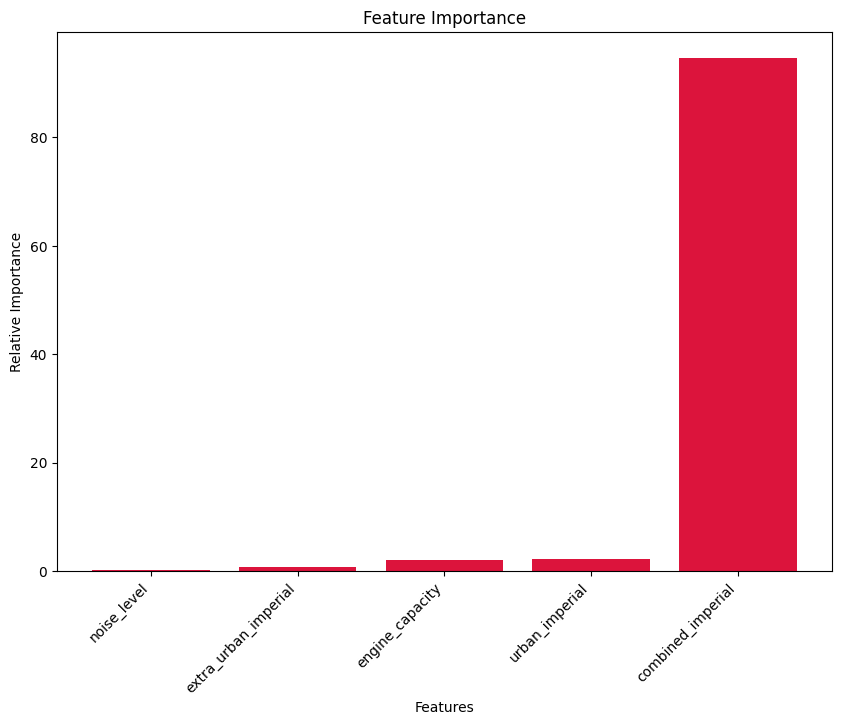

In [103]:
# Assuming bag_reg is a BaggingRegressor with base_estimator=DecisionTreeRegressor or another estimator with feature_importances_
feature_importance_sum = np.zeros(len(features))

for base_estimator in bag_reg.estimators_:
    if hasattr(base_estimator, 'feature_importances_'):
        feature_importance_sum += base_estimator.feature_importances_

# Normalize the feature importances
feature_importance_sum = 100.0 * (feature_importance_sum / np.sum(feature_importance_sum))

# Displaying the relative feature importance by a vertical bar chart
sorted_idx = np.argsort(feature_importance_sum)

# Plotting feature importance
plt.figure(figsize=(10, 7))
plt.bar(range(len(sorted_idx)), feature_importance_sum[sorted_idx], color='crimson', align="center")

# Adding feature names to the x-axis
plt.xticks(range(len(sorted_idx)), np.array(features)[sorted_idx], rotation=45, ha="right")

plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.show()


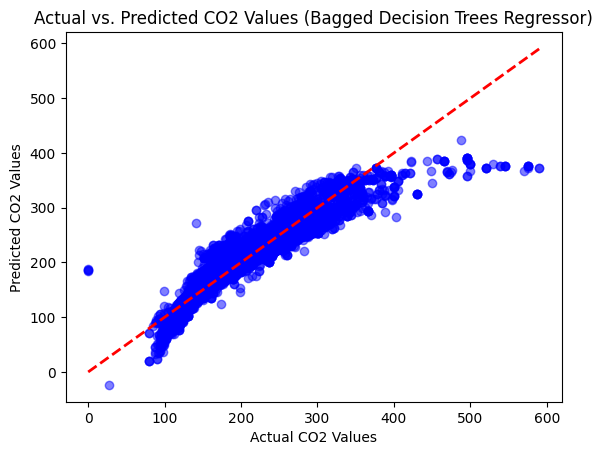

In [104]:
# Scatter plot for actual vs. predicted CO2 values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs. Predicted CO2 Values (Bagged Decision Trees Regressor)')
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')
plt.show()

## $\color{ForestGreen}{\text{Random Forest Regressor}}$
CO2 emissions prediction projects may employ Random Forest Regressor, an ensemble learning approach for continuous outcomes. It trains numerous decision trees and aggregates their predictions to reduce overfitting and increase accuracy. Each tree is made by randomly picking characteristics and data points. Random Forest Regressor can capture complex relationships between features (e.g., engine capacity, fuel efficiency) and predict CO2 emissions better than individual decision trees, making it a powerful regression tool for environmental modeling.

In [105]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=3)

In [106]:
# Finding the predictions of the random forest regressor for train and test subsets

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

In [107]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9993 

R^2 score for test dataset =  0.9962 

Mean Squared Error: 12.193821522724111

Mean Absolute Error: 0.9634618746697368


The Random Forest regression model exhibits outstanding performance with an r2 score of 0.9993 on the training set and 0.9962 on the test set, indicating that it can explain 99.93% and 99.62% of the variance in the respective datasets. Such high r2 values typically raise questions about overfitting, but the strong score on the test set suggests the model has generalized well rather than memorized the training data. 

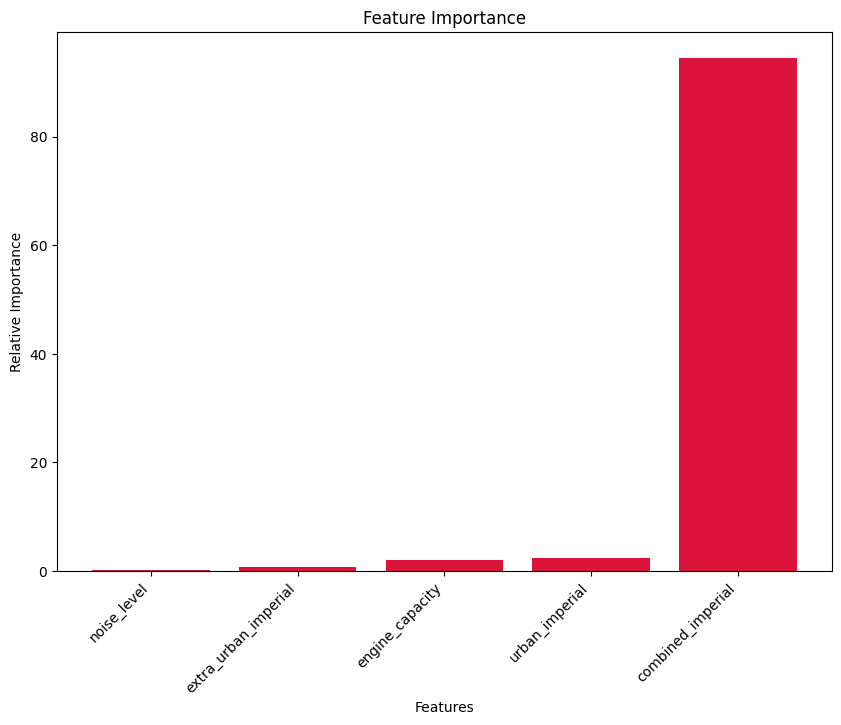

In [108]:
# Calculating the feature importance
feature_importance = rf_reg.feature_importances_
feature_importance = 100.0 * (feature_importance / np.sum(feature_importance))

# Displaying the relative feature importance by a vertical bar chart
sorted_idx = np.argsort(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 7))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], color='crimson', align="center")

# Adding feature names to the x-axis
plt.xticks(range(len(sorted_idx)), np.array(features)[sorted_idx], rotation=45, ha="right")

plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.show()


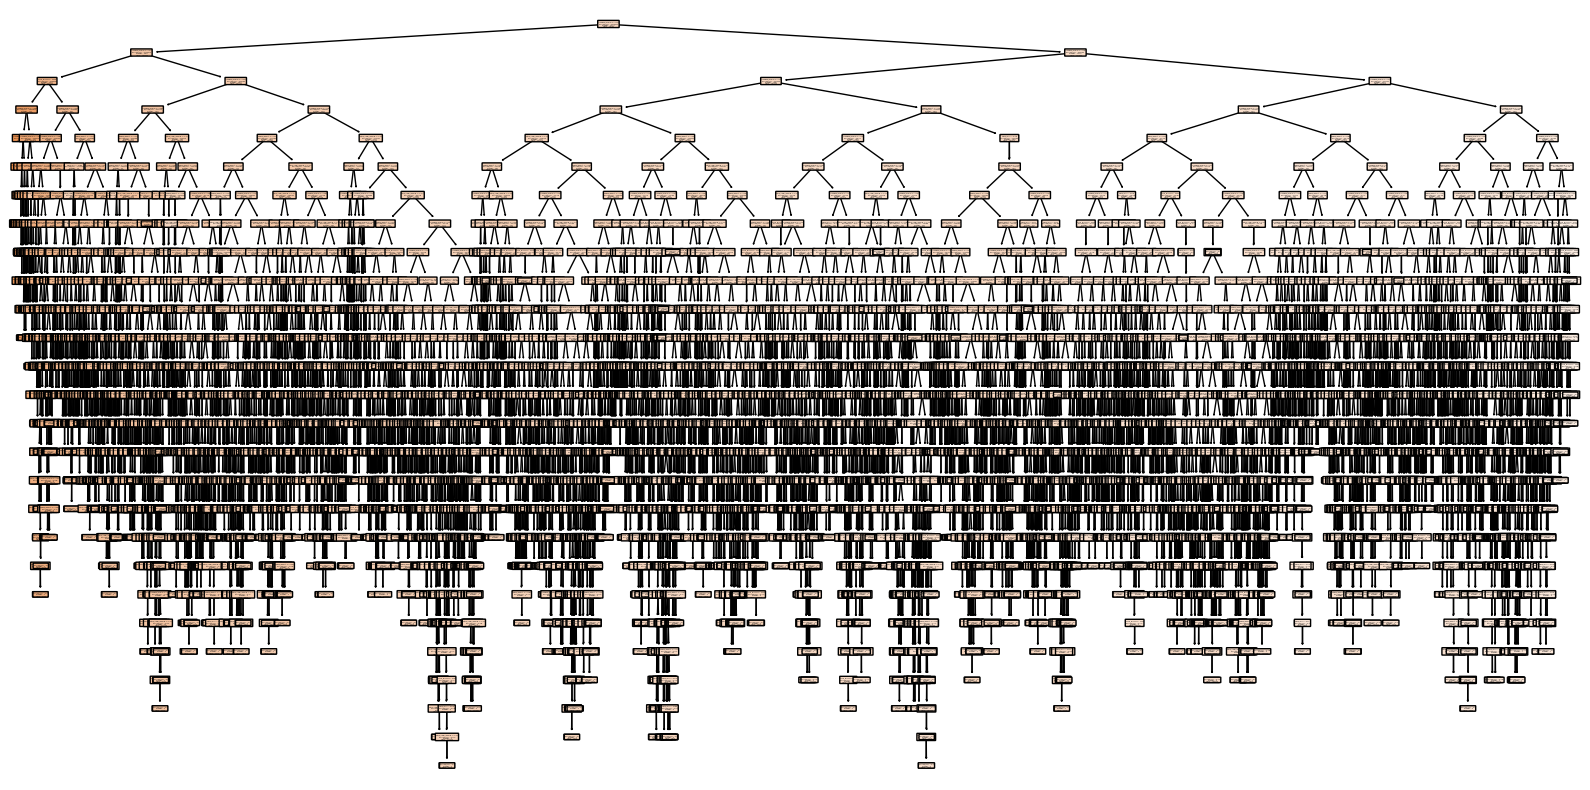

In [109]:
# Visualize a few decision trees
plt.figure(figsize=(20, 10))
plot_tree(rf_reg.estimators_[0], feature_names=features, filled=True, rounded=True)
plt.show()

The combined_imperial is most dominant feature by far and then urban_imperial and engine_capacity and extra_urban_imperial are the dominant features

## $\color{ForestGreen}{\text{Gradient Boosting Regressor}}$
The strong Gradient Boosting Regressor method predicts CO2 emissions in regression. A sequential ensemble of weak learners, usually decision trees, is built. Better prediction accuracy is achieved when each tree corrects earlier faults. The technique reduces training mean squared error and allows complicated data correlations to be captured. It resists outliers, handles non-linearity effectively, and lets you optimize hyperparameters. Gradient Boosting Regressor is commonly utilized for regression applications because to its predictive power and adaptability.

In [110]:
# Importing 'GradientBoostingRegressor'

from sklearn.ensemble import GradientBoostingRegressor

# Instantiating GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

 # Fitting the train data
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [111]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [112]:
r2_train_score = gb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9847 

R^2 score for test dataset =  0.9819 

Mean Squared Error: 58.4716917047807

Mean Absolute Error: 4.350351931046671


In [113]:
# Setting new hyperparameters for gradient boosting regressor
gb_params = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 15, 'learning_rate': 0.01}

gb_reg = GradientBoostingRegressor(**gb_params)  # Applying the new hyperparameters
gb_reg.fit(X_train, y_train)                     # Fitting the train data

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_split=15,
                          n_estimators=1000)

In [114]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [115]:
r2_train_score = gb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9942 

R^2 score for test dataset =  0.9917 

Mean Squared Error: 26.928492565762834

Mean Absolute Error: 2.6731484774613143


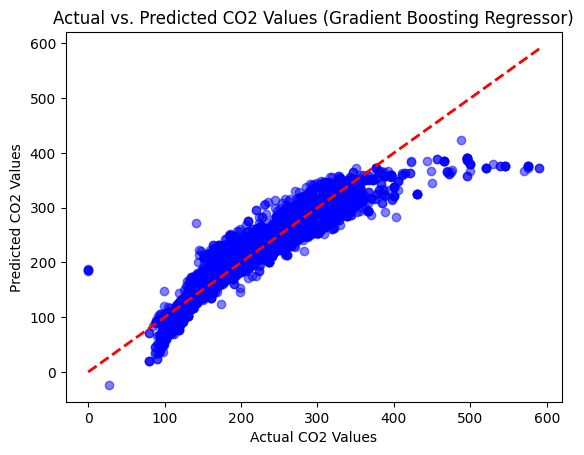

In [116]:
# Scatter plot for actual vs. predicted CO2 values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs. Predicted CO2 Values (Gradient Boosting Regressor)')
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')
plt.show()

## $\color{ForestGreen}{\text{Extreme Gradient Boosting Regressor}}$
XGBoost Regressor is a strong and popular machine learning technique for regression applications, including CO2 emissions prediction. Each decision tree corrects the faults of the preceding one in this ensemble learning approach. XGBoost is efficient, scalable, and handles complicated data interactions. To avoid overfitting, it uses regularization and hyperparameter optimization to maximize performance. Due to its strong prediction accuracy and resilience against multiple data sources, XGBoost is prominent in regression applications.

In [117]:
# Importing 'xgboost'

import xgboost as xgb

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor(n_estimators=700, max_depth=6, eta=0.04, subsample=0.8)

xgb_reg.fit(X_train, y_train)  # Fitting the train data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.04, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=None, num_parallel_tree=None, ...)

In [118]:
# Finding the predictions of XGBoost regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

In [119]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9965 

R^2 score for test dataset =  0.9943 

Mean Squared Error: 18.448254949132526

Mean Absolute Error: 2.2542870497483536


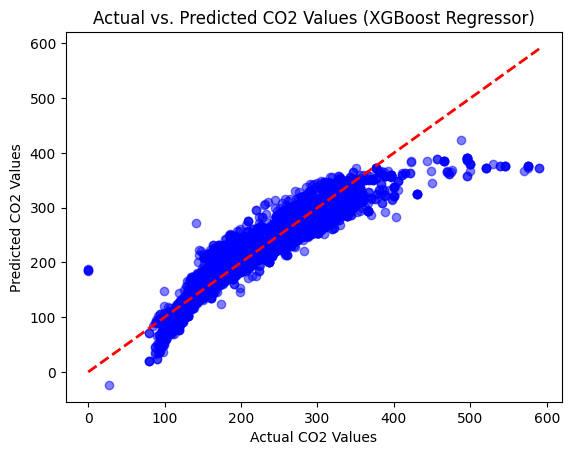

In [120]:
# Scatter plot for actual vs. predicted CO2 values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.title('Actual vs. Predicted CO2 Values (XGBoost Regressor)')
plt.xlabel('Actual CO2 Values')
plt.ylabel('Predicted CO2 Values')
plt.show()

Most of the points are densely clustered near the line, especially in the mid-range of CO2 values, suggesting that the model's predictions are very close to the true values for a significant portion of the dataset. However, there is a visible spread of points as the actual CO2 values increase, implying that the model's predictions deviate more from the actual values at higher CO2 emission levels.

# Neural Network
A neural network-based CO2 emissions prediction project uses a deep learning model to learn complex patterns and relationships in a dataset of features (such as engine capacity, urban and extra-urban fuel efficiency, etc.) to predict CO2 emissions. An input layer for features, hidden layers for learning representations, and an output layer for CO2 emissions make up the neural network. The neural network adjusts its parameters to reduce the discrepancy between projected and actual CO2 emissions during training to accurately forecast incoming data. Neural networks can capture complex data correlations, making them useful for regression problems like CO2 emissions prediction.

In [121]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tqdm import tqdm
import time

# Importing some basic modules in torch

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import BatchSampler, Dataset, DataLoader

In [122]:
def moveTo(obj, device):
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj

In [123]:
def run_epoch(model, optimizer, data_loader, loss_func, device, results, score_funcs, prefix="", desc=None):
    running_loss = []
    y_true = []
    y_pred = []
    start = time.time()
    for inputs, labels in tqdm(data_loader, desc=desc, leave=False):
        #Move the batch to the device we are using.

        inputs = moveTo(inputs, device)
        labels = moveTo(labels, device)

        y_hat = model(inputs) #this just computed f_Θ(x(i))

        # Compute loss.
        loss = loss_func(y_hat, labels)

        if model.training:
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #Now we are just grabbing some information we would like to have
        running_loss.append(loss.item())

        if len(score_funcs) > 0 and isinstance(labels, torch.Tensor):
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            #add to predictions so far
            y_true.extend(labels.tolist())
            y_pred.extend(y_hat.tolist())
    #end training epoch
    end = time.time()

    y_pred = np.asarray(y_pred)

    results[prefix + " loss"].append( np.mean(running_loss) )
    for name, score_func in score_funcs.items():
        try:
            results[prefix + " " + name].append( score_func(y_true, y_pred) )  # For regression
        except:
            results[prefix + " " + name].append(score_func(y_true, np.argmax(y_pred, axis=1))) # For classification
    return end-start #time spent on epoch

In [124]:
def train_simple_network_alt(model, optimizer, loss_func, eta, train_loader, test_loader=None, score_funcs=None,
                         epochs=50, device="cpu"):
    to_track = ["epoch", "total time", "train loss"]
    if test_loader is not None:
        to_track.append("test loss")
    if score_funcs is not None:
        for eval_score in score_funcs:
            to_track.append("train " + eval_score )
            if test_loader is not None:
                to_track.append("test " + eval_score )

    total_train_time = 0              #How long have we spent in the training loop?
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(1, epochs+1), desc="Epoch"):
        model = model.train()#Put our model in training mode

        total_train_time += run_epoch(model, optimizer, train_loader, loss_func, device, results, score_funcs,
                                      prefix="train", desc="Training")
        results["total time"].append( total_train_time )
        results["epoch"].append( epoch )

        if test_loader is not None:
            model = model.eval()
            with torch.no_grad():
                run_epoch(model, optimizer, test_loader, loss_func, device, results, score_funcs, prefix="test",
                          desc="Testing")

    return pd.DataFrame.from_dict(results)

In [125]:
class RegressionDataset(Dataset):

    def __init__(self, X, y):
        self.X = X.reshape(-1,5)  # This code snippet reshapes the array `X` into a 2-dimensional array with a single column. The `reshape()` function is called on `X` with the argument `-1, 1`,
        # where `-1` indicates that the length of the dimension should be inferred based on the size of the input array, and `1` specifies the desired number of columns.
        self.y = y.reshape(-1,1)


    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [126]:
# We use 'torch.utils.data.random_split' to split the data in pytorch into train and test subsets

data = RegressionDataset(X, y)

train_data, test_data = torch.utils.data.random_split(data, (len(data)-45000, 45000))
train_data

In [127]:
train_data_size = len(test_data)
print("Size of train_data subset:", train_data_size)

Size of train_data subset: 45000


In [128]:
# Loading the data through 'DataLoader':

train_loader = DataLoader(train_data , shuffle=True)
test_loader = DataLoader(test_data, shuffle=False)

In [129]:
n_features = 5  # Number of features
n_targets = 1   # Number of targets

n_neurons = 32  # Number of neurons used in hidden layers

eta=0.001       # Learning rate

#del model_1
model_1 = nn.Sequential(
    nn.Linear(n_features,  n_neurons),  # From input layer to hidden layer 1
    nn.Linear(n_neurons,  n_neurons),   # From hidde layer 1 to hidden layer 2
    nn.Linear(n_neurons,  n_neurons),   # From hidde layer 2 to hidden layer 3
    nn.Linear(n_neurons,  n_targets),   # From hidde layer 3 to output layer
)

optimizer = torch.optim.Adam(model_1.parameters(), lr=eta)   # Adam optimizer

loss_func = nn.MSELoss()  # We choose the loss function to be MSE

In [130]:
# Training the model and collect the relevant performance metrics

fc_1_results = train_simple_network_alt(model_1, optimizer, loss_func, eta, train_loader, test_loader,
                         score_funcs={'accuracy':r2_score}, epochs=200)

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/torch/autograd/__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Epoch: 100%|██████████| 200/200 [12:57<00:00,  3.89s/it]


In [131]:
# Displaying the calculated metrics

fc_1_results

epoch  total time   train loss    test loss  train accuracy  \
0        1    0.253700  9656.828234  3260.128890       -2.107387   
1        2    0.500745  2420.747180  1659.488516        0.221049   
2        3    0.748482   984.368464   526.312982        0.683249   
3        4    0.999865   420.497238   395.301099        0.864692   
4        5    1.278203   407.944368   422.494461        0.868731   
..     ...         ...          ...          ...             ...   
195    196   49.913238   343.781933   341.650126        0.889377   
196    197   50.159167   344.566891   748.709751        0.889125   
197    198   50.414241   367.395537   354.020448        0.881779   
198    199   50.662645   356.365100   323.398813        0.885328   
199    200   50.903039   345.911271   326.127568        0.888692   

     test accuracy  
0        -0.003196  
1         0.489348  
2         0.838045  
3         0.878359  
4         0.869991  
..             ...  
195       0.894869  
196       0.769610  
197       0.891062  
198       0.900485  
199       0.899645  

[200 rows x 6 columns]

In [132]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming fc_1_results is a DataFrame containing the relevant performance metrics

# Extracting predictions and targets from the test set
with torch.no_grad():
    model_1.eval()
    y_pred = []
    y_true = []

    for inputs, targets in test_loader:
        outputs = model_1(inputs)
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(targets.cpu().numpy())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Calculate R², MSE, and MAE
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('R-squared (R²):', r2)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


R-squared (R²): 0.8996451570752746
Mean Squared Error (MSE): 326.12756
Mean Absolute Error (MAE): 11.627153


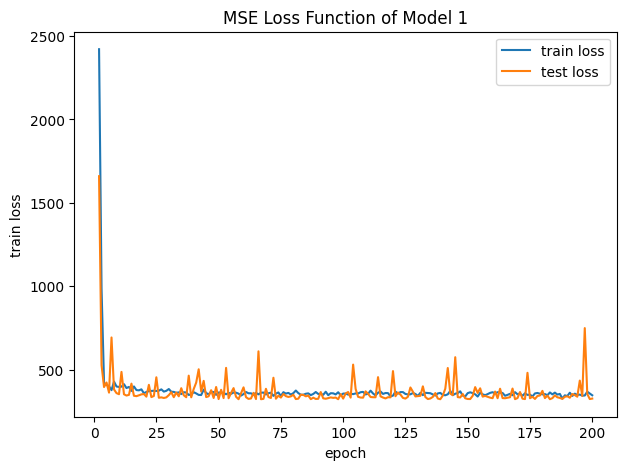

In [133]:
# Plotting the loss function of the fully connected model per epoch:

sns.lineplot(x='epoch', y='train loss', data=fc_1_results[1:], label='train loss')
sns.lineplot(x='epoch', y='test loss', data=fc_1_results[1:], label='test loss')
plt.title('MSE Loss Function of Model 1')
plt.gcf().set_size_inches(7, 5)
plt.show()

The MSE loss plot for the neural network predicting CO2 emissions reveals a successful training process, characterized by a sharp initial decrease in loss for both the training and test datasets, signifying rapid learning. The close convergence and parallel paths of the train and test loss lines throughout the epochs indicate that the model generalizes well and does not exhibit overfitting. The occasional spikes in test loss suggest some variability in the model's performance on different subsets of the data, likely reflecting the iterative nature of learning across epochs. The overall low and stable loss at later epochs signifies that the neural network has learned to predict CO2 emissions effectively, though additional metrics and validation would be beneficial for a comprehensive assessment of its performance.

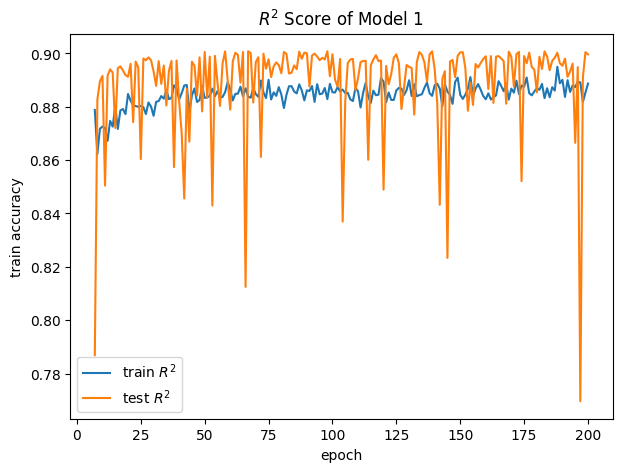

In [134]:
# Plotting the R^2 score of the fully connected model per epoch:

sns.lineplot(x='epoch', y='train accuracy', data=fc_1_results[6:], label=r'train $R^2$')
sns.lineplot(x='epoch', y='test accuracy', data=fc_1_results[6:], label=r'test $R^2$')
plt.title(r'$R^2$ Score of Model 1')
plt.gcf().set_size_inches(7, 5)
plt.show()

 Throughout the epochs, both the training and test R2 scores exhibit fluctuations, yet they maintain a narrow band between approximately 0.86 and 0.9, which suggests a consistent model performance with each epoch. Notably, the test r2 follows closely with the training r2, indicating that the model is generalizing well and not overfitting the training data. The fluctuations seen could be due to the variability in the data being learned across different epochs or the inherent stochasticity of the neural network's training process. The model maintains a relatively high r2score, suggesting it has good predictive power and is stable throughout the training process

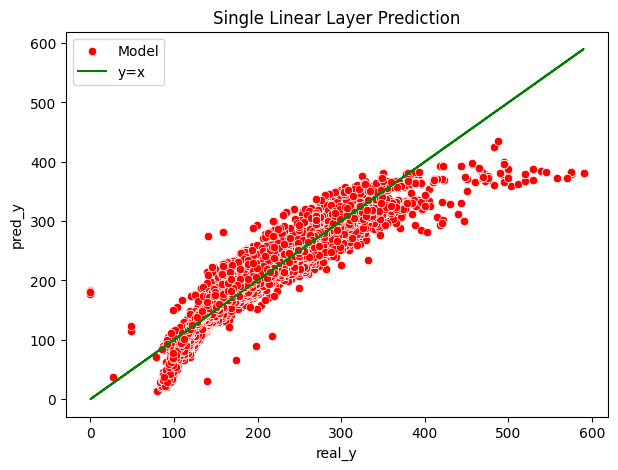

In [141]:
with torch.no_grad():
    Y_pred = model_1(torch.tensor(X.reshape(-1,5), dtype=torch.float32)).cpu().numpy() # Shape of (N, 1)

# Plotting the data points
# sns.scatterplot(x=X, y=y, color='blue', label='Data')

# Plotting the model's predictions
sns.scatterplot(x=y, y=Y_pred.ravel(), color='red', label='Model')

# Adding the line y = x
plt.plot(y, y, color='green', label='y=x')

# Adding x and y labels
plt.xlabel('real_y')
plt.ylabel('pred_y')

plt.title('Single Linear Layer Prediction')
plt.gcf().set_size_inches(7, 5)
plt.legend()
plt.show()

# Support Vector Regression
CO2 emissions forecast programs employ Support Vector Regression (SVR), a machine learning method. SVR finds a high-dimensional hyperplane that best captures the input characteristics and goal variable (CO2 emissions). The goal is to reduce error while accounting for projected value tolerance. SVR excels at non-linear correlations and complicated data patterns. The technique uses a kernel trick to implicitly translate input information into a higher-dimensional space to capture complex connections and accurately forecast continuous target variables like CO2 emissions.

In [142]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model with desired parameters
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the SVR model to the training data
svr.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)

Mean Squared Error: 185.2895181202801

R2 Score: 0.9427481440209571

Mean Absolute Error: 5.889623322938679


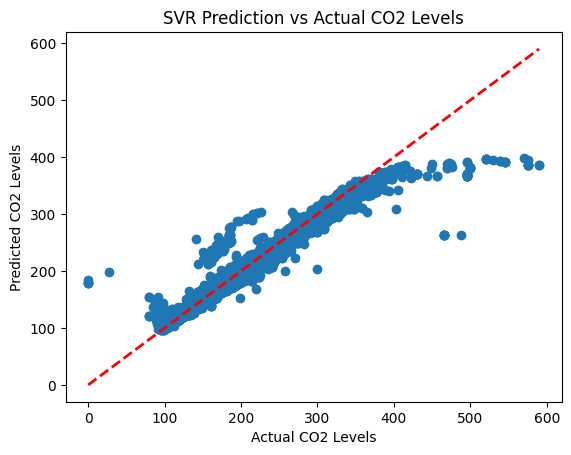

In [143]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.title('SVR Prediction vs Actual CO2 Levels')
plt.show()

# K-Nearest Neighbors (KNN) Regression
K-Nearest Neighbors (KNN) Regression predicts continuous target variables like project CO2 emissions. It finds the dataset's 'k' training samples closest to a new data point in feature space. The new data point's forecast value is the weighted average of its k-nearest neighbors' goal values. KNN Regression is adaptable and straightforward, sensitive to the distance measure and number of neighbors (k), making it suited for situations where local data patterns are critical for good predictions.

In [144]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regression model with desired parameters
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the KNN Regression model to the training data
knn.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)



Mean Squared Error: 35.16475172110737

R2 Score: 0.9891345861250027

Mean Absolute Error: 2.2660026365900103


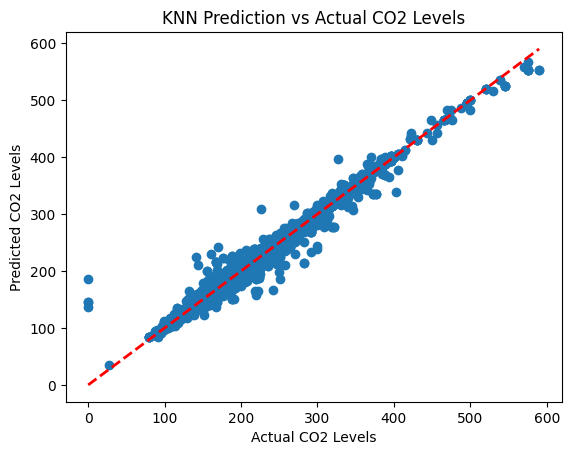

In [145]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.title('KNN Prediction vs Actual CO2 Levels')
plt.show()

Observing the data points, most are closely aligned with the line, indicating that the KNN model has a good level of prediction accuracy for CO2 levels. The points do not stray far from the line, showing that there are no significant outliers or errors in prediction. The plot also displays a consistent pattern across the full range of CO2 levels, suggesting that the model's predictions are reliable across different magnitudes of the target variable

# AdaBoost Regression
AdaBoost Regression predicts CO2 emissions using ensemble learning. It uses numerous weak learners, usually decision trees, to produce a reliable prediction model. AdaBoost weights each data point differently to emphasize cases the model fails to predict. Sequentially training weak models emphasizes misclassified cases from the preceding ones. The forecast is a weighted model total. AdaBoost Regression excels at capturing complicated data correlations in many regression settings.

In [146]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the AdaBoost Regression model with desired parameters
ada_boost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='linear')

# Fit the AdaBoost Regression model to the training data
ada_boost.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = ada_boost.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)



Mean Squared Error: 167.98486491325897

R2 Score: 0.9480950385632189

Mean Absolute Error: 9.552856495206026


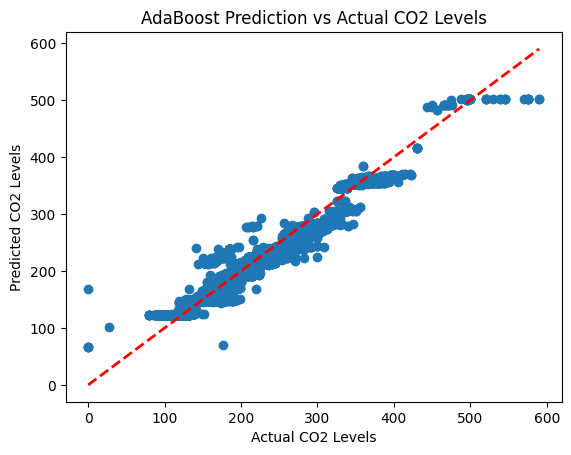

In [147]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.title('AdaBoost Prediction vs Actual CO2 Levels')
plt.show()

# Gaussian Process Regression
Gaussian Process Regression (GPR) is a non-parametric Bayesian method for modeling the connection between input characteristics (e.g., engine capacity, urban and extra-urban emissions) and a continuous target variable like CO2 emissions. GPR predicts function distributions using uncertainty estimates. It models complicated connections with flexibility and adaptability using a covariance function to represent data point similarity. GPR is beneficial for limited data and may reveal CO2 emission forecast uncertainty.

In [148]:
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Initialize the Gaussian Process Regression model with desired parameters
# kernel = RBF(length_scale=1.0)
# gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)

# # Fit the Gaussian Process Regression model to the training data
# gpr.fit(X_train, y_train)

# # Predict the target variable for the test set
# y_pred, sigma = gpr.predict(X_test, return_std=True)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print('Mean Squared Error:', mse)
# print('R2 Score:', r2)



# Bayesian Regression
For a CO2 emissions project, Bayesian Regression models the link between predictor variables (features) and emissions probabilistically. Bayesian Regression provides a distribution of model parameters based on uncertainty in parameter estimations, unlike linear regression. This approach is beneficial for environmental modeling with limited data and uncertainty because it incorporates past knowledge and updates beliefs when new data is observed. For better informed decision-making, the model's projections provide point estimates and uncertainty measures.

In [149]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder  # Add this import


# Initialize the encoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit and transform on the training data
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test data using the same encoder
X_test_encoded = encoder.transform(X_test)

# Instantiate Bayesian Ridge Regression
bayesian_reg = BayesianRidge()

# Fit the train data
bayesian_reg.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = bayesian_reg.predict(X_test_encoded)

# Evaluate the model as before
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)

/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 81.05917528852459

R2 Score: 0.9749538545057576

Mean Absolute Error: 4.066892305666413


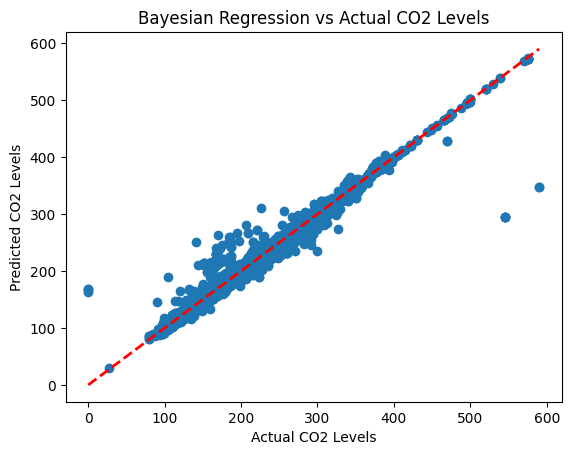

In [150]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual CO2 Levels')
plt.ylabel('Predicted CO2 Levels')
plt.title('Bayesian Regression vs Actual CO2 Levels')
plt.show()

# Another NN Model

In [151]:
n_features = 5  # Number of features
n_targets = 1   # Number of targets

n_neurons = 64  # Number of neurons used in hidden layers

eta=0.001       # Learning rate

#del model_2
model_2 = nn.Sequential(
    nn.Linear(n_features,  n_neurons),   # From input layer to hidden layer 1
    nn.Tanh(),                           # Applying tanh activation function
    nn.Linear(n_neurons,  n_neurons),    # From hidde layer 1 to hidden layer 2
    nn.Tanh(),                           # Applying tanh activation function
    nn.Linear(n_neurons,  n_neurons),    # From hidde layer 2 to hidden layer 3
    nn.Tanh(),                           # Applying tanh activation function
    nn.Linear(n_neurons,  n_targets),    # From hidde layer 3 to output layer
)

optimizer = torch.optim.Adam(model_2.parameters(), lr=eta)    # Adam optimizer

loss_func = nn.MSELoss()                 # We choose the loss function to be MSE

In [152]:
# Training the model and collect the relevant performance metrics

fc_2_results = train_simple_network_alt(model_2, optimizer, loss_func, eta, train_loader, test_loader,
                         score_funcs={'accuracy':r2_score}, epochs=200)

Epoch: 100%|██████████| 200/200 [16:29<00:00,  4.95s/it]


In [153]:
# Displaying the calculated metrics

fc_2_results[-10:]

epoch  total time  train loss   test loss  train accuracy  test accuracy
190    191  116.277846  146.475625  129.617618        0.952867       0.960115
191    192  116.839038  133.827310  126.351055        0.956937       0.961120
192    193  117.378762  133.539384  127.079987        0.957030       0.960895
193    194  117.676429  130.695538  168.929479        0.957945       0.948018
194    195  117.971354  150.887639  127.033141        0.951447       0.960910
195    196  118.562731  140.044585  124.650851        0.954936       0.961643
196    197  118.853890  133.213933  128.342329        0.957134       0.960507
197    198  119.266784  137.346788  132.494020        0.955804       0.959229
198    199  119.875405  137.486467  124.848741        0.955759       0.961582
199    200  120.644743  136.587506  143.846215        0.956049       0.955736

In [154]:
# Assuming fc_1_results is a DataFrame containing the relevant performance metrics

# Extracting predictions and targets from the test set
with torch.no_grad():
    model_2.eval()
    y_pred = []
    y_true = []

    for inputs, targets in test_loader:
        outputs = model_2(inputs)
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(targets.cpu().numpy())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Check the lengths of y_test and y_pred
print("Length of y_true:", len(y_true))
print("Length of y_pred:", len(y_pred))

# Calculate R², MSE, and MAE
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('R-squared (R²):', r2)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


Length of y_true: 45000
Length of y_pred: 45000
R-squared (R²): 0.9557361423326687
Mean Squared Error (MSE): 143.8462
Mean Absolute Error (MAE): 7.1177793


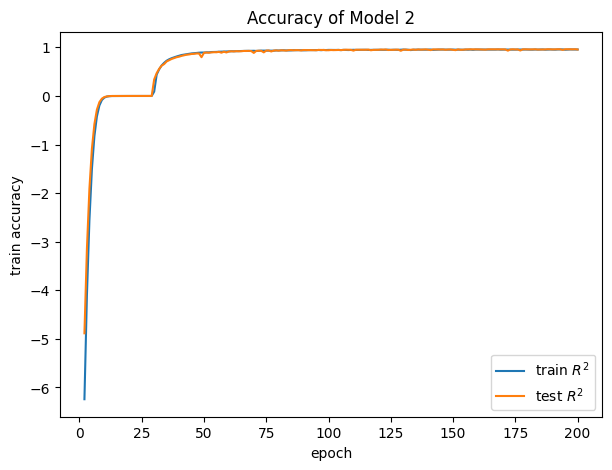

In [155]:
0.956049

sns.lineplot(x='epoch', y='train accuracy', data=fc_2_results[1:], label=r'train $R^2$')
sns.lineplot(x='epoch', y='test accuracy', data=fc_2_results[1:], label=r'test $R^2$')
plt.title('Accuracy of Model 2')
plt.gcf().set_size_inches(7, 5)
plt.show()

Using the tanh activation function, which can capture non-linearities well, seems to have led to a model that generalizes well without overfitting, as indicated by the high and stable r2 scores for both the train and test sets.

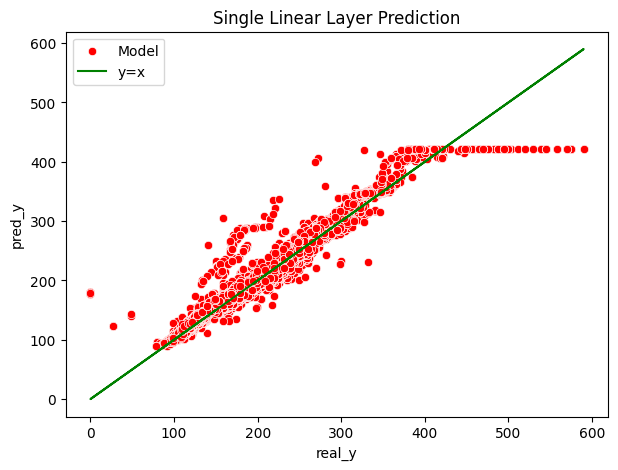

In [156]:
with torch.no_grad():
    Y_pred = model_2(torch.tensor(X.reshape(-1,5), dtype=torch.float32)).cpu().numpy() # Shape of (N, 1)

# Plotting the data points
# sns.scatterplot(x=X, y=y, color='blue', label='Data')

# Plotting the model's predictions
sns.scatterplot(x=y, y=Y_pred.ravel(), color='red', label='Model')

# Adding the line y = x
plt.plot(y, y, color='green', label='y=x')

# Adding x and y labels
plt.xlabel('real_y')
plt.ylabel('pred_y')

plt.title('Single Linear Layer Prediction')
plt.gcf().set_size_inches(7, 5)
plt.legend()
plt.show()

# Adding the categorical columns to the current numerical columns

In [157]:
# Converting the categotrical columns into numerics by label encoding

from sklearn.preprocessing import LabelEncoder

# Assuming your categorical column is named 'category_column'
label_encoder = LabelEncoder()
df['manufacturer'] = label_encoder.fit_transform(df['manufacturer'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])
df['transmission'] = label_encoder.fit_transform(df['transmission'])

In [158]:
df.head

<bound method NDFrame.head of        year  manufacturer          model  euro_standard  transmission  \
0      2000             1      145 Range              2            52   
1      2000             1      145 Range              2            52   
2      2000             1      145 Range              2            52   
3      2000             1      146 Range              2            52   
4      2000             1      146 Range              2            52   
...     ...           ...            ...            ...           ...   
45506  2013            60  New Golf 2013              6            37   
45507  2013            60  New Golf 2013              6            57   
45508  2013            60  New Golf 2013              6            57   
45509  2013            60  New Golf 2013              6            37   
45510  2013            60  New Golf 2013              6            37   

      transmission_type  engine_capacity  fuel_type  urban_imperial  \
0                Manua

In [159]:
features = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial',
                                'combined_imperial', 'noise_level','manufacturer','fuel_type','transmission']
target = ['co2']


X = df[features].values         # Features
y = df[target].values           # Target

In [160]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [161]:
# Importing 'LinearRegression' through linear_model module

from sklearn.linear_model import LinearRegression

reg = LinearRegression()         # Instantiate linear regression
reg.fit(X_train, y_train)        # Fit the train data

r2_train_score = reg.score(X_train, y_train)   # Calculating R^2 score for train data

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('Coefficients of Linear Model:', reg.coef_, '\n')
print('Intercept:', reg.intercept_)

R^2 score for train dataset =  0.9041 

Coefficients of Linear Model: [[ 1.91385439e+02  5.80600842e+00 -2.05838965e+02 -2.40714066e+02
   5.08279866e+01  5.10539718e-02 -5.84803671e-01  3.56797845e-03]] 

Intercept: [231.89190787]


In [162]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Finding the predictions of the model for test dataset

y_pred = reg.predict(X_test)

print(y_pred[:10])  # Representing the price prediction for the first 10 data points in test dataset

# Evaluating the performance of the model on the test dataset

r2_test_score = reg.score(X_test, y_test)   # Calculating R^2 score for train

print('\n R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('\nMean Squared Error:', mse)

[[241.23961998]
 [227.08769885]
 [358.74775625]
 [180.3617813 ]
 [276.98741251]
 [134.46498186]
 [230.38143383]
 [331.17945326]
 [299.97231548]
 [169.83329187]]

 R^2 score for test dataset =  0.9006 


Mean Absolute Error: 11.142005677232428

Mean Squared Error: 321.7774843609616


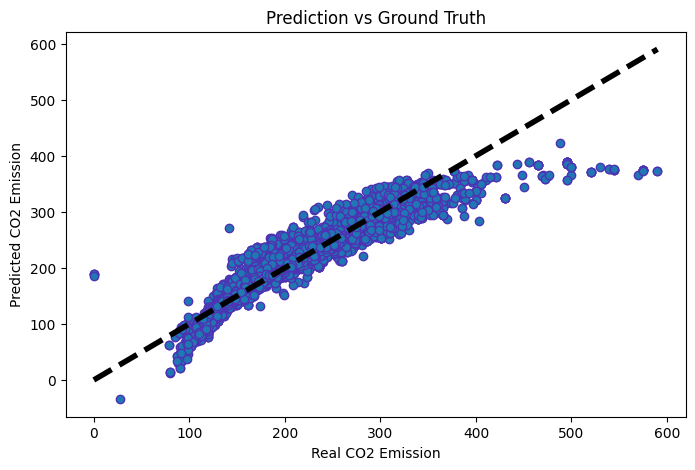

In [163]:
import matplotlib.pyplot as plt

# Let's plot predictions vs ground truth for 'co2'

fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot for predictions vs truth
ax.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))

# Draw line y=x
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

ax.set_xlabel('Real CO2 Emission')
ax.set_ylabel('Predicted CO2 Emission')
plt.title('Prediction vs Ground Truth', fontdict=None, loc='center')
plt.show()

## $\color{ForestGreen}{\text{Visualizing the Effects of Lasso(L1) and Ridge(L2) Regularization on CO2 Emission Prediction with categorical Value}}$


R^2 score for test dataset L1 =  0.8988

R^2 score for test dataset L2 =  0.9006

Mean Absolute Error for test dataset L1: 11.1963

Mean Absolute Error for test dataset L2: 11.142

Mean Squared Error for test dataset L1: 327.6635

Mean Squared Error for test dataset L2: 321.7783


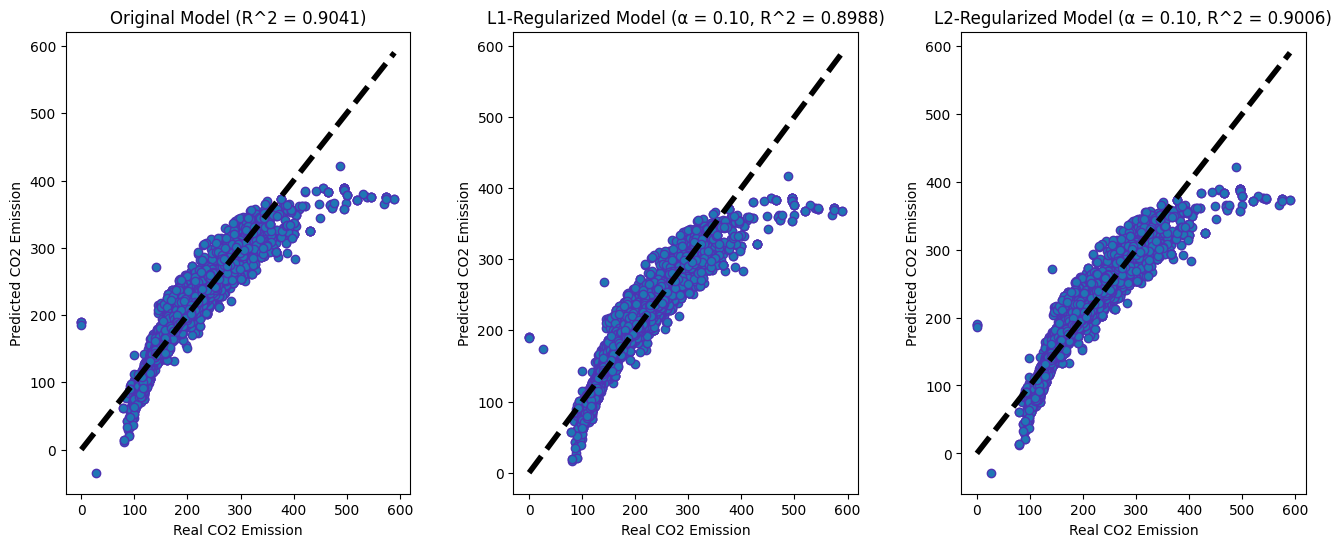

In [164]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Define regularization parameters
alpha_l1 = 0.1
alpha_l2 = 0.1

# Fit L1-regularized model
reg_l1 = Lasso(alpha=alpha_l1)
reg_l1.fit(X_train, y_train)

# Fit L2-regularized model
reg_l2 = Ridge(alpha=alpha_l2)
reg_l2.fit(X_train, y_train)

# Predict CO2 emission for test data
y_pred_l1 = reg_l1.predict(X_test)
y_pred_l2 = reg_l2.predict(X_test)

# Calculate R^2 scores for L1 and L2 models
r2_l1 = reg_l1.score(X_test, y_test)
r2_l2 = reg_l2.score(X_test, y_test)

# Evaluate the performance using Mean Absolute Error for L1 and L2 models
mae_l1 = mean_absolute_error(y_test, y_pred_l1)
mae_l2 = mean_absolute_error(y_test, y_pred_l2)

# Evaluate the performance using Mean Squared Error
mse_l1 = mean_squared_error(y_test, y_pred_l1)
mse_l2 = mean_squared_error(y_test, y_pred_l2)

print('\nR^2 score for test dataset L1 = ', round(r2_l1, 4))
print('\nR^2 score for test dataset L2 = ', round(r2_l2, 4))

print('\nMean Absolute Error for test dataset L1:', round(mae_l1,4))
print('\nMean Absolute Error for test dataset L2:', round(mae_l2,4))

print('\nMean Squared Error for test dataset L1:', round(mse_l1,4))
print('\nMean Squared Error for test dataset L2:', round(mse_l2,4))

plt.figure(figsize=(16, 6))

# Plot original model predictions
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, edgecolors=(0.3, 0.2, 0.7))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Original Model (R^2 = %.4f)' % r2_train_score)
plt.xlabel('Real CO2 Emission')
plt.ylabel('Predicted CO2 Emission')

# Plot L1-regularized model predictions
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_l1, edgecolors=(0.3, 0.2, 0.7))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('L1-Regularized Model (α = %.2f, R^2 = %.4f)' % (alpha_l1, r2_l1))
plt.xlabel('Real CO2 Emission')
plt.ylabel('Predicted CO2 Emission')

# Plot L2-regularized model predictions
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_l2, edgecolors=(0.3, 0.2, 0.7))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('L2-Regularized Model (α = %.2f, R^2 = %.4f)' % (alpha_l2, r2_l2))
plt.xlabel('Real CO2 Emission')
plt.ylabel('Predicted CO2 Emission')

plt.subplots_adjust(wspace=0.3)
plt.show()


The results show that the 'urban_imperial', 'extra_urban_imperial', 'combined_imperial' columns have more correlation with co2 while engine_capacity has less correlation and noise_level is of less importance

# Decision Tree Regression

In [165]:
# Constructing a tree regressor with no specified hyperparameters

from sklearn import tree

# Instantiate Decision Tree Regressor
tr_reg = tree.DecisionTreeRegressor(max_depth=3)   # You can adjust max_depth for control over the tree depth

# Fit the train data
tr_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [166]:
# Finding the predictions of the tree regressor for train and test subsets

train_y_pred = tr_reg.predict(X_train)
test_y_pred = tr_reg.predict(X_test)

In [167]:
from sklearn.metrics import mean_absolute_error

r2_train_score = tr_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = tr_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)


R^2 score for train dataset =  0.9266 

R^2 score for test dataset =  0.9231 

Mean Squared Error: 248.92870110416234

Mean Absolute Error: 11.165401627998891


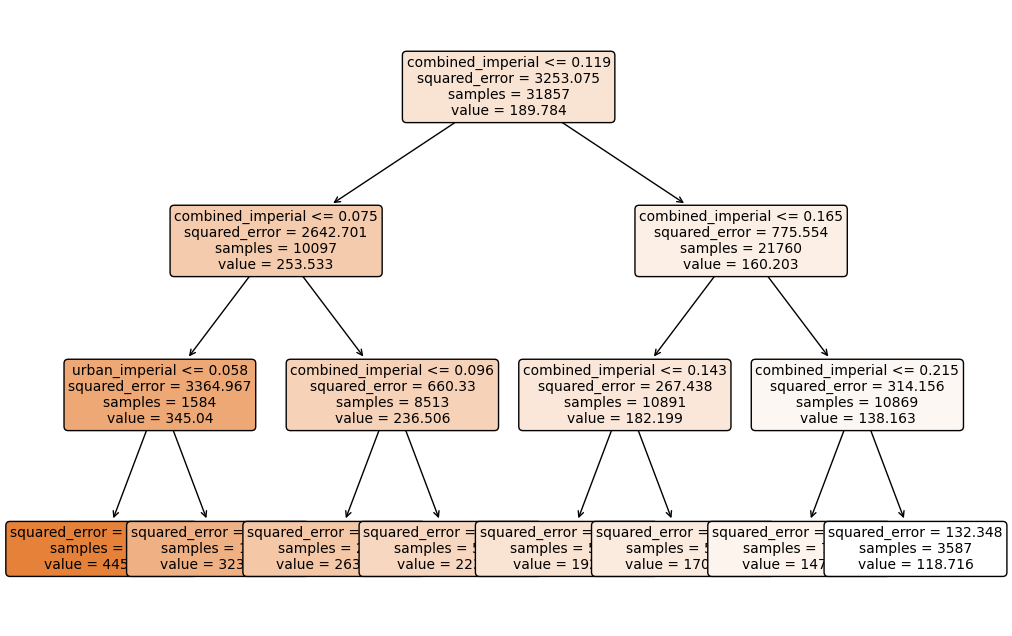

In [168]:
# Visualize the Decision Tree (optional)X
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tr_reg, filled=True, feature_names=features, rounded=True, fontsize=10)
plt.show()

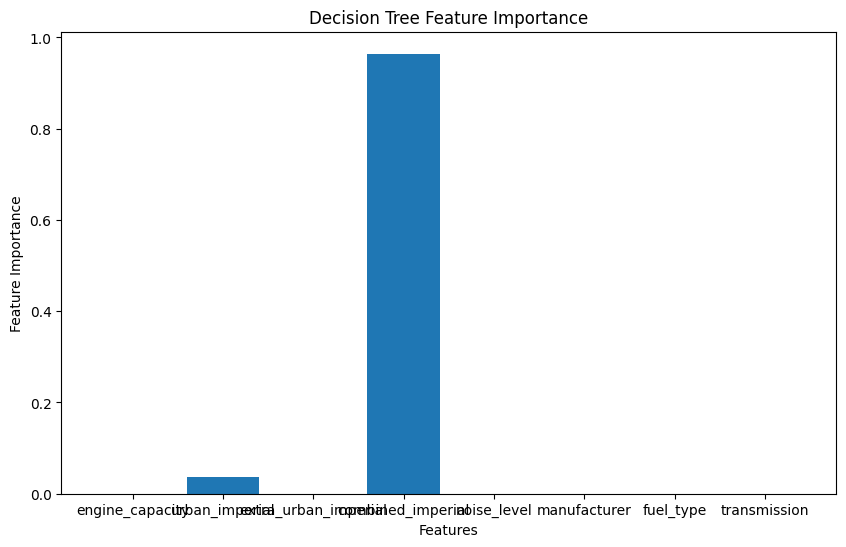

In [169]:
importances = tr_reg.feature_importances_
# Shows which features are more influential in making predictions.
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

## $\color{ForestGreen}{\text{Bagged Decision Trees Regressor}}$

In [170]:
# Importing BaggingRegressor from ensemble module

from sklearn.ensemble import BaggingRegressor

# Instantiating the bagged-tree regressor
bag_reg = BaggingRegressor(estimator=tree.DecisionTreeRegressor(), n_estimators=100, random_state=3)

# Fit the Bagged Regressor to the training data
bag_reg.fit(X_train, y_train)

/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=3)

In [171]:
# Finding the predictions of bagged-tree regressor for train and test subsets

train_y_pred = bag_reg.predict(X_train)
test_y_pred = bag_reg.predict(X_test)

In [172]:
r2_train_score = bag_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = bag_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9995 

R^2 score for test dataset =  0.9982 

Mean Squared Error: 5.939893524368469

Mean Absolute Error: 0.65019861585951


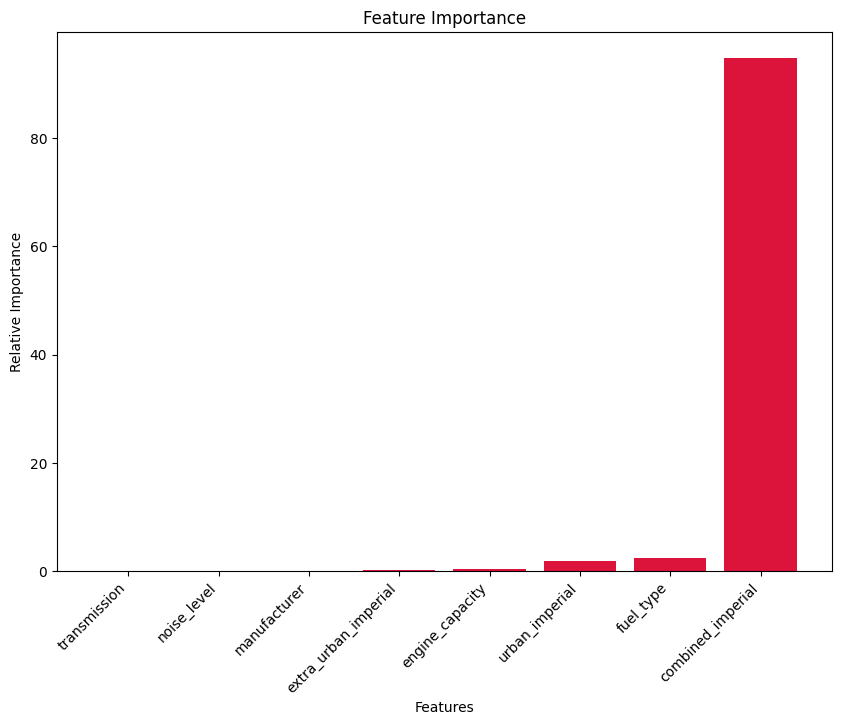

In [173]:
# Assuming bag_reg is a BaggingRegressor with base_estimator=DecisionTreeRegressor or another estimator with feature_importances_
feature_importance_sum = np.zeros(len(features))

for base_estimator in bag_reg.estimators_:
    if hasattr(base_estimator, 'feature_importances_'):
        feature_importance_sum += base_estimator.feature_importances_

# Normalize the feature importances
feature_importance_sum = 100.0 * (feature_importance_sum / np.sum(feature_importance_sum))

# Displaying the relative feature importance by a vertical bar chart
sorted_idx = np.argsort(feature_importance_sum)

# Plotting feature importanceX
plt.figure(figsize=(10, 7))
plt.bar(range(len(sorted_idx)), feature_importance_sum[sorted_idx], color='crimson', align="center")

# Adding feature names to the x-axis
plt.xticks(range(len(sorted_idx)), np.array(features)[sorted_idx], rotation=45, ha="right")

plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.show()


## $\color{ForestGreen}{\text{Random Forest Regressor}}$

In [174]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor
# Instantiate Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)

# Fit the model to the training data
rf_reg.fit(X_train, y_train)

/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, random_state=3)

In [175]:
# Finding the predictions of the random forest regressor for train and test subsets

train_y_pred = rf_reg.predict(X_train)
test_y_pred = rf_reg.predict(X_test)

In [176]:
r2_train_score = rf_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = rf_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9995 

R^2 score for test dataset =  0.9982 

Mean Squared Error: 5.742394536543764

Mean Absolute Error: 0.6418685677880402


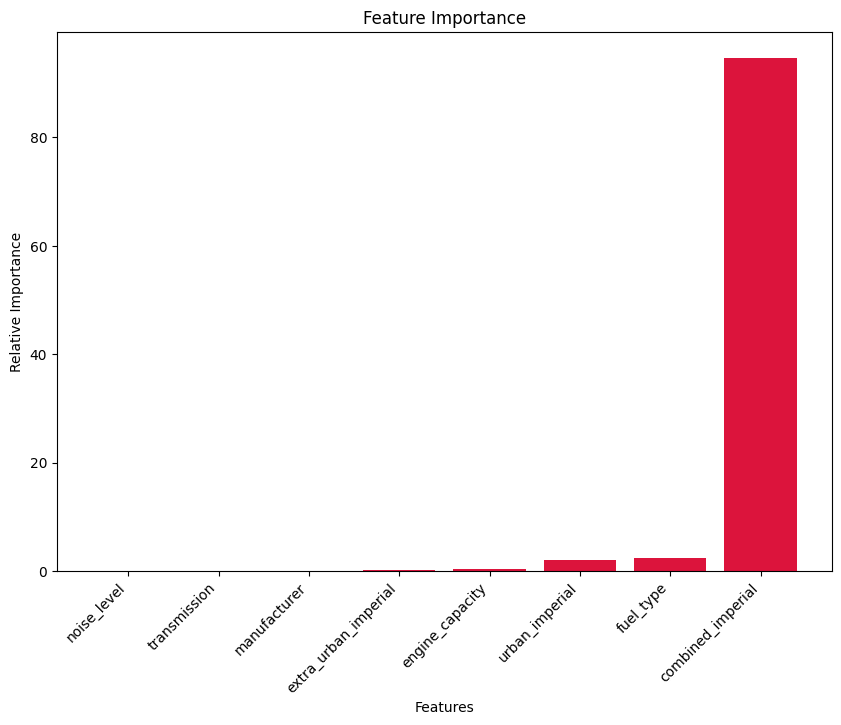

In [177]:
# Calculating the feature importance
feature_importance = rf_reg.feature_importances_
feature_importance = 100.0 * (feature_importance / np.sum(feature_importance))

# Displaying the relative feature importance by a vertical bar chart
sorted_idx = np.argsort(feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 7))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], color='crimson', align="center")

# Adding feature names to the x-axis
plt.xticks(range(len(sorted_idx)), np.array(features)[sorted_idx], rotation=45, ha="right")

plt.title("Feature Importance")
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.show()



the combined_imperial is most dominant feature by far and then fuel_type and urban_imperial and engine_capacity are importannt features.

## $\color{ForestGreen}{\text{Gradient Boosting Regressor}}$

In [178]:
# Importing 'GradientBoostingRegressor'

from sklearn.ensemble import GradientBoostingRegressor

# Instantiating GradientBoostingRegressor
gb_reg = GradientBoostingRegressor()

 # Fitting the train data
gb_reg.fit(X_train, y_train)

/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [179]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [180]:
r2_train_score = gb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.995 

R^2 score for test dataset =  0.9942 

Mean Squared Error: 18.695481606916406

Mean Absolute Error: 2.4522657584525445


In [181]:
# Setting new hyperparameters for gradient boosting regressor
gb_params = {'n_estimators': 1000, 'max_depth': 6, 'min_samples_split': 15, 'learning_rate': 0.01}

gb_reg = GradientBoostingRegressor(**gb_params)  # Applying the new hyperparameters
gb_reg.fit(X_train, y_train)                     # Fitting the train data

/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_split=15,
                          n_estimators=1000)

In [182]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [183]:
r2_train_score = gb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9984 

R^2 score for test dataset =  0.9976 

Mean Squared Error: 7.755819843530196

Mean Absolute Error: 1.4852370973259714


## $\color{ForestGreen}{\text{Extreme Gradient Boosting Regressor}}$

In [184]:
# Importing 'xgboost'

import xgboost as xgb

# Instantiate 'XGBRegressor'
xgb_reg = xgb.XGBRegressor(n_estimators=700, max_depth=6, eta=0.04, subsample=0.8)

xgb_reg.fit(X_train, y_train)  # Fitting the train data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.04, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=700,
             n_jobs=None, num_parallel_tree=None, ...)

In [185]:
# Finding the predictions of XGBoost regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

In [186]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, test_y_pred)
print('\nMean Absolute Error:', mae)

R^2 score for train dataset =  0.9989 

R^2 score for test dataset =  0.998 

Mean Squared Error: 6.483601720193058

Mean Absolute Error: 1.3170740056984314


In [187]:
class RegressionDataset(Dataset):

    def __init__(self, X, y):
        self.X = X.reshape(-1,8)  # This code snippet reshapes the array `X` into a 2-dimensional array with a single column. The `reshape()` function is called on `X` with the argument `-1, 1`,
        # where `-1` indicates that the length of the dimension should be inferred based on the size of the input array, and `1` specifies the desired number of columns.
        self.y = y.reshape(-1,1)


    def __getitem__(self, index):
        return torch.tensor(self.X[index,:], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

# Neural Network

In [188]:
# We use 'torch.utils.data.random_split' to split the data in pytorch into train and test subsets

data = RegressionDataset(X, y)

train_data, test_data = torch.utils.data.random_split(data, (len(data)-45000, 45000))
train_data

In [189]:
train_data_size = len(test_data)
print("Size of train_data subset:", train_data_size)

Size of train_data subset: 45000


In [190]:
# Loading the data through 'DataLoader':

train_loader = DataLoader(train_data , shuffle=True)
test_loader = DataLoader(test_data, shuffle=False)

In [191]:
n_features = 8  # Number of features
n_targets = 1   # Number of targets

n_neurons = 32  # Number of neurons used in hidden layers

eta=0.001       # Learning rate

#del model_1
model_1 = nn.Sequential(
    nn.Linear(n_features,  n_neurons),  # From input layer to hidden layer 1
    nn.Linear(n_neurons,  n_neurons),   # From hidde layer 1 to hidden layer 2
    nn.Linear(n_neurons,  n_neurons),   # From hidde layer 2 to hidden layer 3
    nn.Linear(n_neurons,  n_targets),   # From hidde layer 3 to output layer
)

optimizer = torch.optim.Adam(model_1.parameters(), lr=eta)   # Adam optimizer

loss_func = nn.MSELoss()  # We choose the loss function to be MSE

In [192]:
# Training the model and collect the relevant performance metrics

fc_1_results = train_simple_network_alt(model_1, optimizer, loss_func, eta, train_loader, test_loader,
                         score_funcs={'accuracy':r2_score}, epochs=200)

Epoch: 100%|██████████| 200/200 [13:22<00:00,  4.01s/it]


In [193]:
# Displaying the calculated metrics

fc_1_results

epoch  total time   train loss    test loss  train accuracy  \
0        1    0.282107  9505.410524  6930.639242       -2.041030   
1        2    0.602406  6001.988819  5052.529818       -0.920194   
2        3    0.878477  5241.651471  4607.764472       -0.676942   
3        4    1.122262  4582.167588  4389.723999       -0.465956   
4        5    1.416618  4302.686742  4296.461603       -0.376542   
..     ...         ...          ...          ...             ...   
195    196   51.545122   393.407587   338.487956        0.874139   
196    197   51.792597   409.802550   352.928577        0.868893   
197    198   52.038170   392.999868   352.789026        0.874269   
198    199   52.281123   410.046771   408.186004        0.868815   
199    200   52.545792   397.647382   367.672348        0.872782   

     test accuracy  
0        -1.132844  
1        -0.554873  
2        -0.418000  
3        -0.350900  
4        -0.322199  
..             ...  
195       0.895833  
196       0.891389  
197       0.891432  
198       0.874384  
199       0.886852  

[200 rows x 6 columns]

In [194]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming fc_1_results is a DataFrame containing the relevant performance metrics

# Extracting predictions and targets from the test set
with torch.no_grad():
    model_1.eval()
    y_pred = []
    y_true = []

    for inputs, targets in test_loader:
        outputs = model_1(inputs)
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(targets.cpu().numpy())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Calculate R², MSE, and MAE
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('R-squared (R²):', r2)
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)


R-squared (R²): 0.8868520047710232
Mean Squared Error (MSE): 367.67236
Mean Absolute Error (MAE): 12.336583


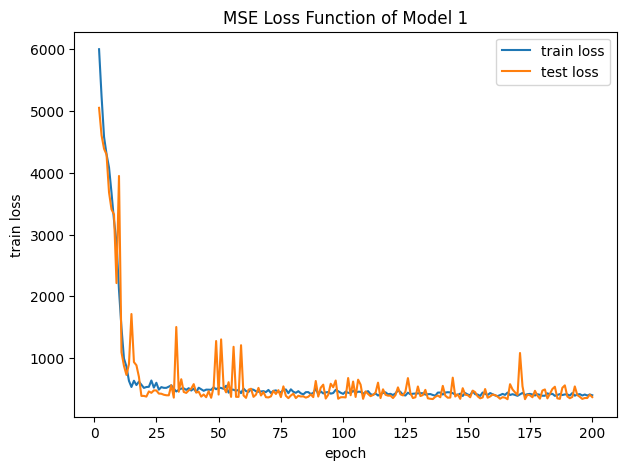

In [195]:
# Plotting the loss function of the fully connected model per epoch:

sns.lineplot(x='epoch', y='train loss', data=fc_1_results[1:], label='train loss')
sns.lineplot(x='epoch', y='test loss', data=fc_1_results[1:], label='test loss')
plt.title('MSE Loss Function of Model 1')
plt.gcf().set_size_inches(7, 5)
plt.show()

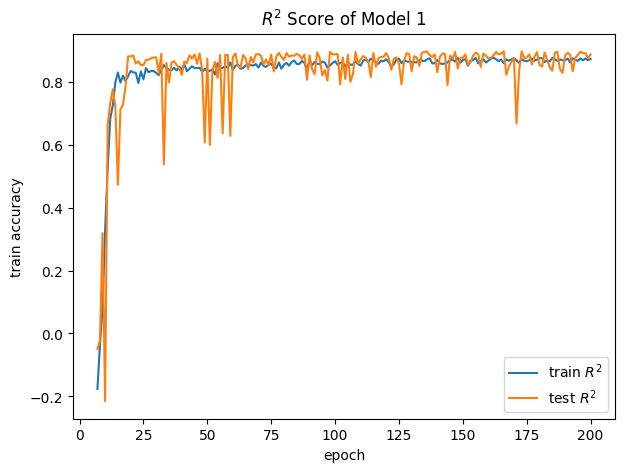

In [196]:
# Plotting the R^2 score of the fully connected model per epoch:

sns.lineplot(x='epoch', y='train accuracy', data=fc_1_results[6:], label=r'train $R^2$')
sns.lineplot(x='epoch', y='test accuracy', data=fc_1_results[6:], label=r'test $R^2$')
plt.title(r'$R^2$ Score of Model 1')
plt.gcf().set_size_inches(7, 5)
plt.show()

In [ ]:
with torch.no_grad():
    Y_pred = model_1(torch.tensor(X.reshape(-1,5), dtype=torch.float32)).cpu().numpy() # Shape of (N, 1)

# Plotting the data points
# sns.scatterplot(x=X, y=y, color='blue', label='Data')

# Plotting the model's predictions
sns.scatterplot(x=y, y=Y_pred.ravel(), color='red', label='Model')

# Adding the line y = x
plt.plot(y, y, color='green', label='y=x')

# Adding x and y labels
plt.xlabel('real_y')
plt.ylabel('pred_y')

plt.title('Single Linear Layer Prediction')
plt.gcf().set_size_inches(7, 5)
plt.legend()
plt.show()

# Support vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model with desired parameters
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the SVR model to the training data
svr.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 171.6427335634957

R2 Score: 0.946964808578932

Mean Absolute Error: 3.8976763868572464


# KNN regressor

In [201]:


from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regression model with desired parameters
knn = KNeighborsRegressor(n_neighbors=5)

# Fit the KNN Regression model to the training data
knn.fit(X_train_scaled, y_train)

# Predict the target variable for the test set
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)



Mean Squared Error: 26.257896587080708

R2 Score: 0.9918866791334614

Mean Absolute Error: 2.1962355353742495


# AdaBoost Regression

In [202]:



from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the AdaBoost Regression model with desired parameters
ada_boost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='linear')

# Fit the AdaBoost Regression model to the training data
ada_boost.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = ada_boost.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)



/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: 169.27376827314012

R2 Score: 0.9476967855466456

Mean Absolute Error: 9.515020223431746


# Gaussian Process Regression

In [ ]:



# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# # Initialize the Gaussian Process Regression model with desired parameters
# kernel = RBF(length_scale=1.0)
# gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, normalize_y=True)

# # Fit the Gaussian Process Regression model to the training data
# gpr.fit(X_train, y_train)

# # Predict the target variable for the test set
# y_pred, sigma = gpr.predict(X_test, return_std=True)

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print('Mean Squared Error:', mse)
# print('R2 Score:', r2)




# Bayesian Regression

In [203]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Instantiate Bayesian Ridge Regression
bayesian_reg = BayesianRidge()

# Fit the train data
bayesian_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bayesian_reg.predict(X_test)

# Optionally, you can access the coefficients and other information
print('Coefficients:', bayesian_reg.coef_)
print('Intercept:', bayesian_reg.intercept_)
print('Lambda (regularization parameter):', bayesian_reg.lambda_)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print('\nR2 Score:', r2)

# Evaluate the performance using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print('\nMean Absolute Error:', mae)

Coefficients: [ 1.91386475e+02  5.46248395e+00 -2.06002670e+02 -2.39445338e+02
  5.07803952e+01  5.10383845e-02 -5.84698857e-01  3.56173359e-03]
Intercept: 231.9189889246395
Lambda (regularization parameter): 5.7486293431827066e-05
Mean Squared Error: 321.77713869923406

R2 Score: 0.9005753882408055

Mean Absolute Error: 11.142008036198707


/home/kianoush/Desktop/kianoush/test/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Another NN model

In [204]:
import torch
import torch.nn as nn
from torch.optim import Adam

class NeuralNetwork(nn.Module):
    def __init__(self, n_features, n_neurons, n_targets):
        super(NeuralNetwork, self).__init__()
        self.hidden_layers = nn.Sequential(
            nn.Linear(n_features, n_neurons),
            nn.ReLU(),
            nn.Linear(n_neurons, n_neurons),
            nn.ReLU(),
            nn.Linear(n_neurons, n_neurons),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(n_neurons,  n_targets)
    
    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x
  
n_features = 8  # Number of features
n_targets = 1   # Number of targets
n_neurons = 64  # Number of neurons used in hidden layers
eta = 0.001     # Learning rate

model_3 = NeuralNetwork(n_features, n_neurons, n_targets)
optimizer = Adam(model_3.parameters(), lr=eta)  # Adam optimizer 
loss_func = nn.MSELoss()                          # Loss function: MSE

In [206]:
# Training the model and collect the relevant performance metrics 

fc_3_results = train_simple_network_alt(model_3, optimizer, loss_func, eta, train_loader, test_loader, 
                         score_funcs={'accuracy':r2_score}, epochs=200)

Epoch: 100%|██████████| 200/200 [17:02<00:00,  5.11s/it]


In [ ]:
fc_3_results[:10]

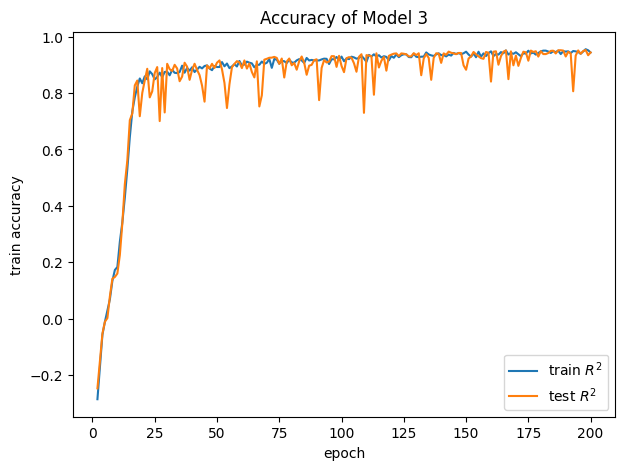

In [207]:
# Plotting the accuracy of model 3:

sns.lineplot(x='epoch', y='train accuracy', data=fc_3_results[1:], label=r'train $R^2$')
sns.lineplot(x='epoch', y='test accuracy', data=fc_3_results[1:], label=r'test $R^2$')
plt.title('Accuracy of Model 3')
plt.gcf().set_size_inches(7, 5)
plt.show()

In [ ]:
with torch.no_grad():
    Y_pred = model_3(torch.tensor(X.reshape(-1,8), dtype=torch.float32)).cpu().numpy() # Shape of (N, 1)

# Plotting the data points
# sns.scatterplot(x=X, y=y, color='blue', label='Data')

# Plotting the model's predictions
sns.scatterplot(x=y, y=Y_pred.ravel(), color='red', label='Model')

# Adding the line y = x
plt.plot(y, y, color='green', label='y=x')

# Adding x and y labels
plt.xlabel('real_y')
plt.ylabel('pred_y')

plt.title('Single Linear Layer Prediction')
plt.gcf().set_size_inches(7, 5)
plt.legend()
plt.show()

# Now without encoding the categorical columns, we are gonna predict accuracy of the non linear models

In [2]:
# Since the file is now provided, let's load the CSV and apply MinMaxScaler to the specified columns.

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load the dataset from the CSV file
en_df = pd.read_csv('cleaned_dataset_imputed.csv')

# Select the columns you want to scale
columns_to_scale = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial',
                    'combined_imperial', 'noise_level']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the selected columns
en_df[columns_to_scale] = scaler.fit_transform(en_df[columns_to_scale])

# Display the first few rows of the dataframe to verify the scaling
en_df.head()


year manufacturer      model  euro_standard transmission transmission_type  \
0  2000   Alfa Romeo  145 Range              2           M5            Manual   
1  2000   Alfa Romeo  145 Range              2           M5            Manual   
2  2000   Alfa Romeo  145 Range              2           M5            Manual   
3  2000   Alfa Romeo  146 Range              2           M5            Manual   
4  2000   Alfa Romeo  146 Range              2           M5            Manual   

   engine_capacity fuel_type  urban_imperial  extra_urban_imperial  \
0         0.171991    Petrol        0.220641              0.414130   
1         0.190441    Petrol        0.211151              0.406522   
2         0.218053    Petrol        0.189798              0.406522   
3         0.171991    Petrol        0.215896              0.406522   
4         0.190441    Petrol        0.211151              0.406522   

   combined_imperial  noise_level  co2  co_emissions  nox_emissions  
0           0.124183     0.891304  195         980.0           56.0  
1           0.120697     0.891304  200        1105.0           56.0  
2           0.114161     0.891304  210        1103.0           56.0  
3           0.122440     0.879227  195         980.0           56.0  
4           0.120697     0.891304  200        1105.0           56.0

In [3]:
en_features = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial',
                                'combined_imperial', 'noise_level','manufacturer','fuel_type','transmission']
en_target = ['co2']


en_X = en_df[en_features].values         # Features
en_y = en_df[en_target].values           # Target

In [4]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

en_X_train, en_X_test, en_y_train, en_y_test = train_test_split(en_X, en_y, test_size=0.3, random_state=3)

In [6]:
# Constructing a random forest regressor

from sklearn.ensemble import RandomForestRegressor
# Instantiate Random Forest Regressor
en_rf_reg = RandomForestRegressor(n_estimators=1000, random_state=3)

# Fit the model to the training data
en_rf_reg.fit(en_X_train, en_y_train)

ValueError: could not convert string to float: 'Ford'

### In the context of fitting a Random Forest Regressor using scikit-learn version 1.0, the error ValueError: could not convert string to float: 'Ford' occurs because this version of scikit-learn requires all input data to be numerical. Categorical data, such as manufacturer names, must be converted to a numerical format before model training, typically through methods like one-hot encoding or label encoding. While more recent versions of scikit-learn can handle categorical data directly, version 1.0 does not have this capability. Therefore, in our case, the non-numeric categorical variables in the dataset (like 'Ford') need to be encoded into numeric values to be compatible with the Random Forest algorithm and avoid the aforementioned error.

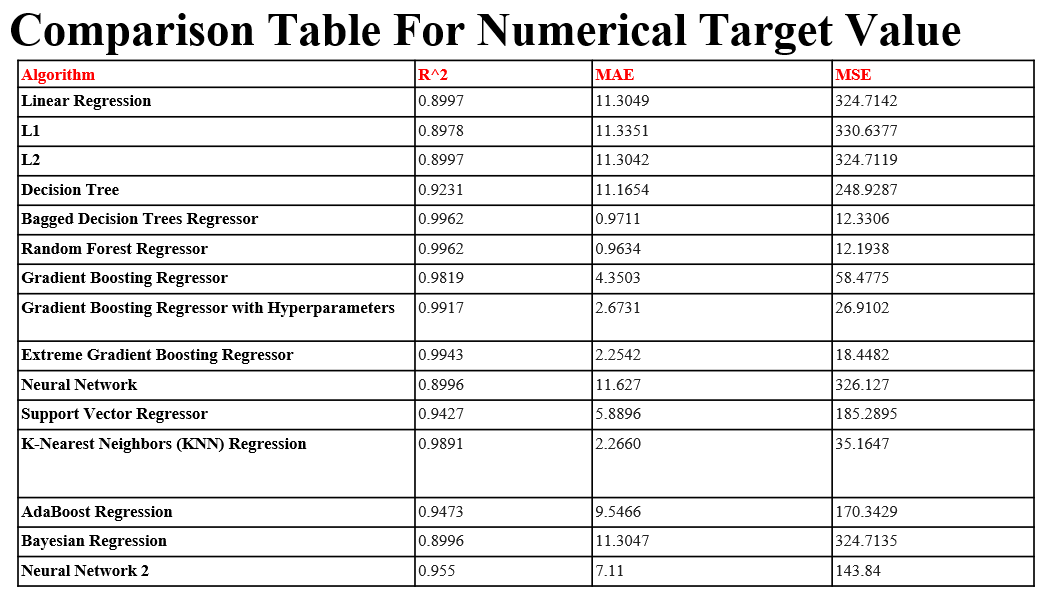

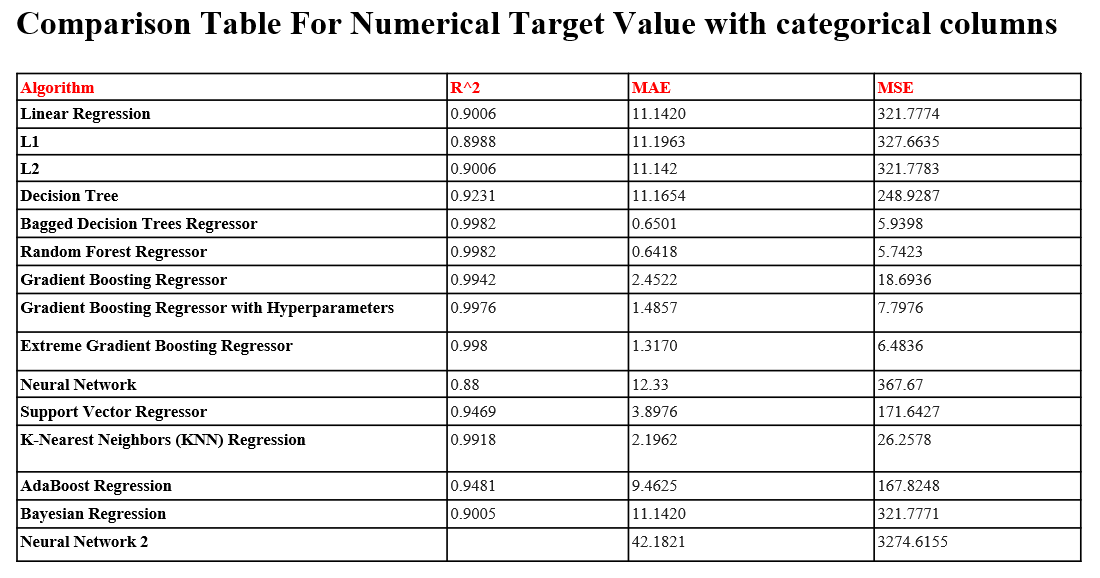

Note: All values are for the test dataset

For the first table, which excludes categorical columns, ensemble methods, specifically the Random Forest Regressor and Bagged Decision Trees Regressor, emerge as the top performers with an R-squared value of 0.9962, indicating that they can explain nearly 99.62% of the variance in CO2 emissions from the given features. The Random Forest Regressor stands out not only in terms of R-squared but also for its precision in prediction, with the lowest Mean Absolute Error (MAE) of 0.9711 and Mean Squared Error (MSE) of 12.3306 among all the models tested. This suggests that when it comes to predicting CO2 emissions without considering categorical variables, the Random Forest Regressor is likely to provide the most accurate and consistent predictions. On the other end of the spectrum, the Linear Regression model and its regularized counterparts, L1 and L2, although not the worst in terms of MAE and MSE, offer less explanatory power compared to more complex models. They hold R-squared values just shy of 0.9, implying that they explain less variation in the dependent variable compared to the ensemble methods.



Regarding the second table, which includes categorical columns, the Extreme Gradient Boosting Regressor outshines all other algorithms with the highest R-squared value of 0.998. This high R-squared value suggests that the model explains 99.8% of the variability in the CO2 emissions, indicating an exceptionally good fit to the data. The Extreme Gradient Boosting Regressor also records the lowest MAE and MSE of 1.3170 and 6.4836, respectively, underscoring its superior predictive accuracy and reliability in the presence of categorical variables. In stark contrast, the Neural Network 2 model performs poorly when categorical variables are included, with an MAE of 42.1821 and an MSE of 3274.6155. These figures are substantially higher than those of any other model, revealing that this particular neural network architecture might not be suitable for this dataset or might require further tuning and structure adjustments to handle the categorical data effectively. The discrepancy in performance across models when categorical variables are considered suggests that the way these models process and leverage categorical information can significantly impact their predictive capabilities.

# Research Questions

In [7]:
import pandas as pd
research_df = pd.read_csv('cleaned_dataset_imputed.csv')
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
columns_to_scale = ['engine_capacity', 'urban_imperial', 'extra_urban_imperial', 
                                'combined_imperial', 'noise_level']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on the selected columns
research_df[columns_to_scale] = scaler.fit_transform(research_df[columns_to_scale])

# Print the updated dataframe
print(research_df.head())

   year manufacturer      model  euro_standard transmission transmission_type  \
0  2000   Alfa Romeo  145 Range              2           M5            Manual   
1  2000   Alfa Romeo  145 Range              2           M5            Manual   
2  2000   Alfa Romeo  145 Range              2           M5            Manual   
3  2000   Alfa Romeo  146 Range              2           M5            Manual   
4  2000   Alfa Romeo  146 Range              2           M5            Manual   

   engine_capacity fuel_type  urban_imperial  extra_urban_imperial  \
0         0.171991    Petrol        0.220641              0.414130   
1         0.190441    Petrol        0.211151              0.406522   
2         0.218053    Petrol        0.189798              0.406522   
3         0.171991    Petrol        0.215896              0.406522   
4         0.190441    Petrol        0.211151              0.406522   

   combined_imperial  noise_level  co2  co_emissions  nox_emissions  
0           0.124183  

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for categorical columns
label_encoders = {col: LabelEncoder() for col in research_df.select_dtypes(include=['object']).columns}

# Apply label encoding to each categorical column
for col, encoder in label_encoders.items():
    research_df[col] = encoder.fit_transform(research_df[col])

# Display the first few rows of the updated dataframe
research_df.head()


year  manufacturer  model  euro_standard  transmission  transmission_type  \
0  2000             1     28              2            52                  1   
1  2000             1     28              2            52                  1   
2  2000             1     28              2            52                  1   
3  2000             1     29              2            52                  1   
4  2000             1     29              2            52                  1   

   engine_capacity  fuel_type  urban_imperial  extra_urban_imperial  \
0         0.171991          8        0.220641              0.414130   
1         0.190441          8        0.211151              0.406522   
2         0.218053          8        0.189798              0.406522   
3         0.171991          8        0.215896              0.406522   
4         0.190441          8        0.211151              0.406522   

   combined_imperial  noise_level  co2  co_emissions  nox_emissions  
0           0.124183     0.891304  195         980.0           56.0  
1           0.120697     0.891304  200        1105.0           56.0  
2           0.114161     0.891304  210        1103.0           56.0  
3           0.122440     0.879227  195         980.0           56.0  
4           0.120697     0.891304  200        1105.0           56.0

### How does engine capacity correlate with CO2 emissions, and can a machine learning model effectively predict this relationship?

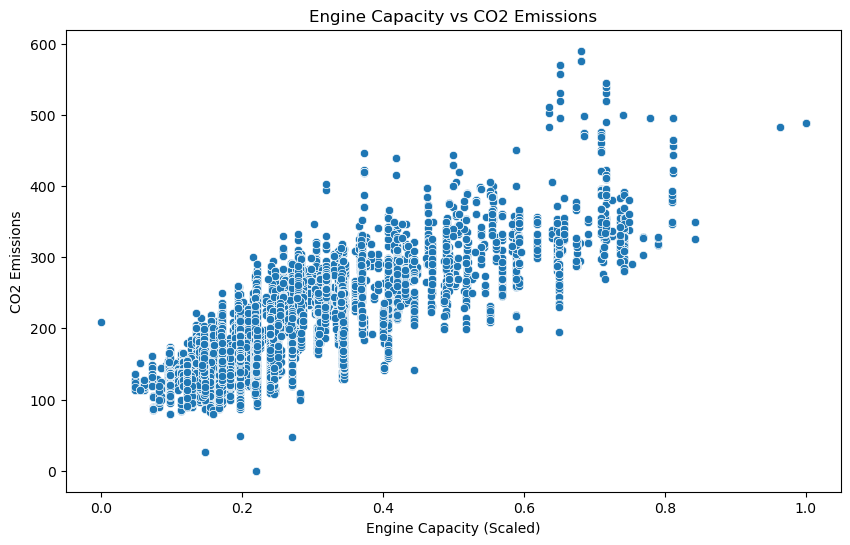

Pearson Correlation Coefficient: 0.7974380700444187


('R² Score (Coefficient of Determination): 0.6377620368729713',
 'Mean Squared Error (MSE): 1195.5736103291104')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Columns of interest
x_column = 'engine_capacity'
y_column = 'co2'

# Checking for linear relationship visually
plt.figure(figsize=(10, 6))
sns.scatterplot(x=research_df[x_column], y=research_df[y_column])
plt.title('Engine Capacity vs CO2 Emissions')
plt.xlabel('Engine Capacity (Scaled)')
plt.ylabel('CO2 Emissions')
plt.show()

# Calculating the Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(research_df[x_column], research_df[y_column])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

# Preparing data for linear regression
engine_CO2_X = research_df[[x_column]].values
engine_CO2_y = research_df[y_column].values

# Splitting the dataset into training and testing sets
engine_CO2_X_train, engine_CO2_X_test, engine_CO2_y_train, engine_CO2_y_test = train_test_split(engine_CO2_X, engine_CO2_y, test_size=0.2, random_state=42)

# Creating linear regression model
engine_CO2_model = LinearRegression()
engine_CO2_model.fit(engine_CO2_X_train, engine_CO2_y_train)

# Predicting on test data
engine_CO2_y_pred = engine_CO2_model.predict(engine_CO2_X_test)

# Calculating metrics
engine_CO2_mse = mean_squared_error(engine_CO2_y_test, engine_CO2_y_pred)
engine_CO2_r2 = r2_score(engine_CO2_y_test, engine_CO2_y_pred)

engine_CO2_mse, engine_CO2_r2
# Printing the R2 and MSE metrics
r2_message = f"R² Score (Coefficient of Determination): {engine_CO2_r2}"
mse_message = f"Mean Squared Error (MSE): {engine_CO2_mse}"

r2_message, mse_message


A strong positive linear connection among engine capacity and CO2 emissions is shown by the significant Pearson correlation value of roughly 0.797. This high level of association means that as engine capacity grows, so do CO2 emissions. This connection, together with the R2 score of about 0.638, implies that engine capacity is a major predictor of CO2 emissions, accounting for a sizable percentage of the emissions variation. However, while the Mean Squared Error (MSE) of 1195.57 does not distract from the strong linear connection, it does imply that there is still significant variability in CO2 emissions that the model based only on engine capacity does not capture. This implies that other factors impact CO2 emissions, and that include these elements might potentially improve the model's forecast accuracy.

### Can the noise level of a vehicle be predicted based on engine capacity, fuel type, and transmission type?

In [10]:
from sklearn.svm import SVR 
e_f_t_n_features = research_df[['engine_capacity', 'fuel_type', 'transmission_type']]
e_f_t_n_target = research_df['noise_level']
# Splitting the data into training and testing sets
e_f_t_n_X_train, e_f_t_n_X_test, e_f_t_n_y_train, e_f_t_n_y_test = train_test_split(e_f_t_n_features, e_f_t_n_target, test_size=0.2, random_state=42)

# Initialize Linear Regression and Support Vector Regression models
e_f_t_n_lr_model = LinearRegression()
e_f_t_n_svr_model = SVR(kernel='linear')  # Using a linear kernel for SVR

# Fitting the models on the training data
e_f_t_n_lr_model.fit(e_f_t_n_X_train, e_f_t_n_y_train)
e_f_t_n_svr_model.fit(e_f_t_n_X_train, e_f_t_n_y_train)

# Predicting on the test data
e_f_t_n_y_pred_lr = e_f_t_n_lr_model.predict(e_f_t_n_X_test)
e_f_t_n_y_pred_svr = e_f_t_n_svr_model.predict(e_f_t_n_X_test)

# Calculating metrics for Linear Regression
e_f_t_n_mse_lr = mean_squared_error(e_f_t_n_y_test, e_f_t_n_y_pred_lr)
e_f_t_n_r2_lr = r2_score(e_f_t_n_y_test, e_f_t_n_y_pred_lr)

# Calculating metrics for Support Vector Regression
e_f_t_n_mse_svr = mean_squared_error(e_f_t_n_y_test, e_f_t_n_y_pred_svr)
e_f_t_n_r2_svr = r2_score(e_f_t_n_y_test, e_f_t_n_y_pred_svr)

# Printing statements for R² and MSE for both Linear Regression and Support Vector Regression
print(f"Linear Regression - R²: {e_f_t_n_r2_lr}, MSE: {e_f_t_n_mse_lr}")
print(f"Support Vector Regression - R²: {e_f_t_n_r2_svr}, MSE: {e_f_t_n_mse_svr}")


Linear Regression - R²: 0.0844308847028965, MSE: 0.000531581795262538
Support Vector Regression - R²: -2.030045686974552, MSE: 0.001759252359104274


For Linear Regression:

R² Score: 0.0844
Mean Squared Error (MSE): 0.0005316
For Support Vector Regression (SVR):

R² Score: -2.0300
MSE: 0.0017593

Interpretation:
R² Score: The R² score for Linear Regression is very low, indicating that the model explains only about 8.44% of the variance in noise levels. This is not considered a good fit, as the majority of the variance is unexplained by the model. The R² score for SVR is negative, which is worse than just predicting the mean of the target variable; this indicates a very poor fit.

MSE: The MSE for Linear Regression is relatively low, which would typically suggest that the model's predictions are close to the actual values. However, considering the low R² score, the low MSE might not be indicative of a good predictive model in this context. The MSE for SVR is higher than for Linear Regression, which aligns with its poor performance indicated by the negative R² score.

Given the current results, it would be difficult to assert that the noise level of a vehicle can be accurately predicted based solely on engine capacity, fuel type, and transmission type, at least not with the models and features used here. The prediction quality is not high, and the models are likely not capturing all the factors that influence noise level.

### Are certain manufacturers and models more efficient in terms of emissions (CO2), and can we predict this efficiency based on available vehicle specifications?

In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Preparing the feature matrix and target vectors
features = research_df[['manufacturer', 'model', 'engine_capacity', 'fuel_type', 'euro_standard']]
targets = research_df[['co2']]

# Splitting the data into training and testing sets for both targets
X_train_co2, X_test_co2, y_train_co2, y_test_co2 = train_test_split(features, targets['co2'], test_size=0.2, random_state=42)

# Initialize the Random Forest and Gradient Boosting models
rf_co2 = RandomForestRegressor(n_estimators=100, random_state=42)
gb_co2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
# Fit the models for CO2 emissions
rf_co2.fit(X_train_co2, y_train_co2)
gb_co2.fit(X_train_co2, y_train_co2)

# Predict on the test data for CO2
y_pred_rf_co2 = rf_co2.predict(X_test_co2)
y_pred_gb_co2 = gb_co2.predict(X_test_co2)

# Calculate metrics for CO2 emissions
mse_rf_co2 = mean_squared_error(y_test_co2, y_pred_rf_co2)
mse_gb_co2 = mean_squared_error(y_test_co2, y_pred_gb_co2)
r2_rf_co2 = r2_score(y_test_co2, y_pred_rf_co2)
r2_gb_co2 = r2_score(y_test_co2, y_pred_gb_co2)

# Print out the metrics for both CO2 and NOx emissions for both models
print(f"Random Forest - CO2 - MSE: {mse_rf_co2}, R²: {r2_rf_co2}")
print(f"Gradient Boosting - CO2 - MSE: {mse_gb_co2}, R²: {r2_gb_co2}")

Random Forest - CO2 - MSE: 127.15327979836904, R²: 0.9614747727106462
Gradient Boosting - CO2 - MSE: 409.6708289243963, R²: 0.8758768800682339


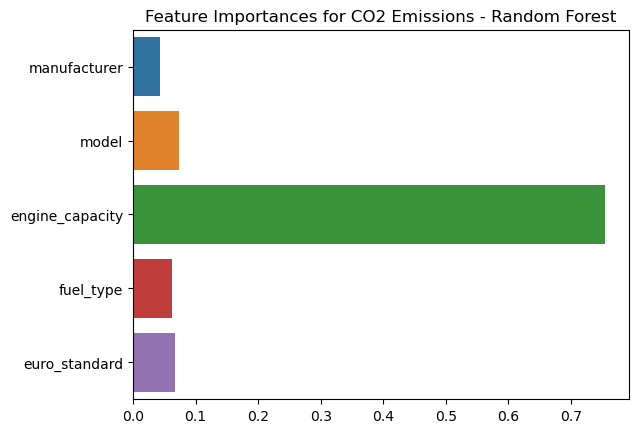

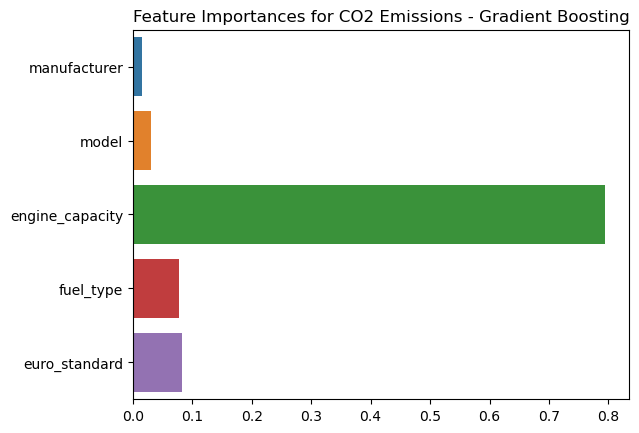

In [12]:
importances_rf_co2 = rf_co2.feature_importances_
sns.barplot(x=importances_rf_co2, y=features.columns)
plt.title('Feature Importances for CO2 Emissions - Random Forest')
plt.show()

importances_gb_co2 = gb_co2.feature_importances_
sns.barplot(x=importances_gb_co2, y=features.columns)
plt.title('Feature Importances for CO2 Emissions - Gradient Boosting')
plt.show()


The feature importance plots for CO2 emissions reveal that engine capacity is the predominant factor influencing emissions, consistent across both Random Forest and Gradient Boosting models. Euro standard compliance also plays a significant role, reflecting the impact of regulatory measures on emissions reductions. Fuel type has a moderate effect, while the specific manufacturer and model have the least influence among the considered features. These insights affirm that vehicle emissions can be predicted using available specifications, with technical and regulatory attributes outweighing the brand or model identity. This suggests that policies aimed at reducing engine size and enforcing stringent emission standards could be more effective in controlling CO2 emissions than focusing solely on the manufacturer or model.

###  Can engine capacity, transmission type (manual or automatic), and fuel type be used to predict a vehicle's fuel efficiency (e.g., combined_imperial representing combined fuel efficiency)?

In [13]:
e_t_f_features = research_df[['engine_capacity', 'transmission_type', 'fuel_type']]
e_t_f_target = research_df['combined_imperial']

# Splitting the data into training and testing sets
e_t_f_X_train, e_t_f_X_test, e_t_f_y_train, e_t_f_y_test = train_test_split(e_t_f_features, e_t_f_target, test_size=0.2, random_state=42)

# Initializing the two models
e_t_f_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
e_t_f_gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fitting the models on the training data
e_t_f_rf_regressor.fit(e_t_f_X_train, e_t_f_y_train)
e_t_f_gb_regressor.fit(e_t_f_X_train, e_t_f_y_train)

# Predictions on the test data
e_t_f_rf_predictions = e_t_f_rf_regressor.predict(e_t_f_X_test)
e_t_f_gb_predictions = e_t_f_gb_regressor.predict(e_t_f_X_test)

# Calculating and printing R² and MSE for both models
e_t_f_rf_r2 = r2_score(e_t_f_y_test, e_t_f_rf_predictions)
e_t_f_rf_mse = mean_squared_error(e_t_f_y_test, e_t_f_rf_predictions)
e_t_f_gb_r2 = r2_score(e_t_f_y_test, e_t_f_gb_predictions)
e_t_f_gb_mse = mean_squared_error(e_t_f_y_test, e_t_f_gb_predictions)

print(f"Random Forest - R²: {e_t_f_rf_r2}, MSE: {e_t_f_rf_mse}")
print(f"Gradient Boosting - R²: {e_t_f_gb_r2}, MSE: {e_t_f_gb_mse}")


Random Forest - R²: 0.8647154795868197, MSE: 0.00036307477101009384
Gradient Boosting - R²: 0.8284505753351896, MSE: 0.0004604020318574537


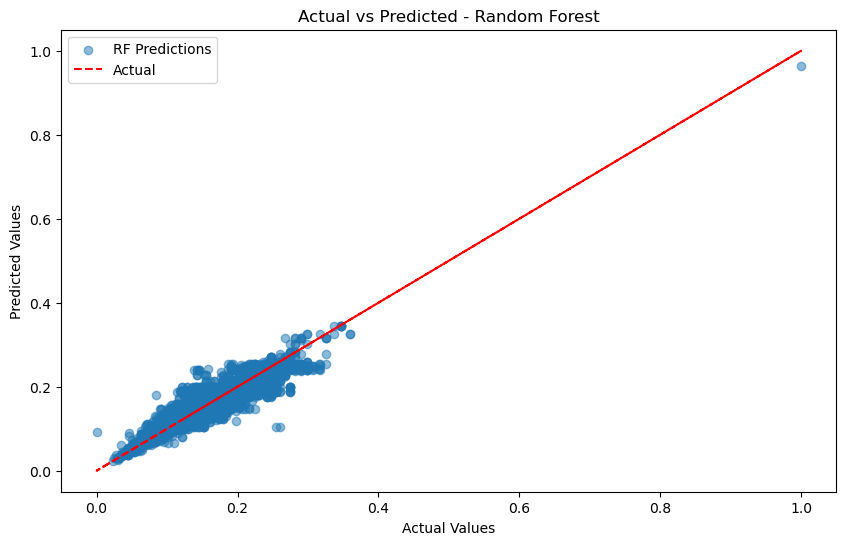

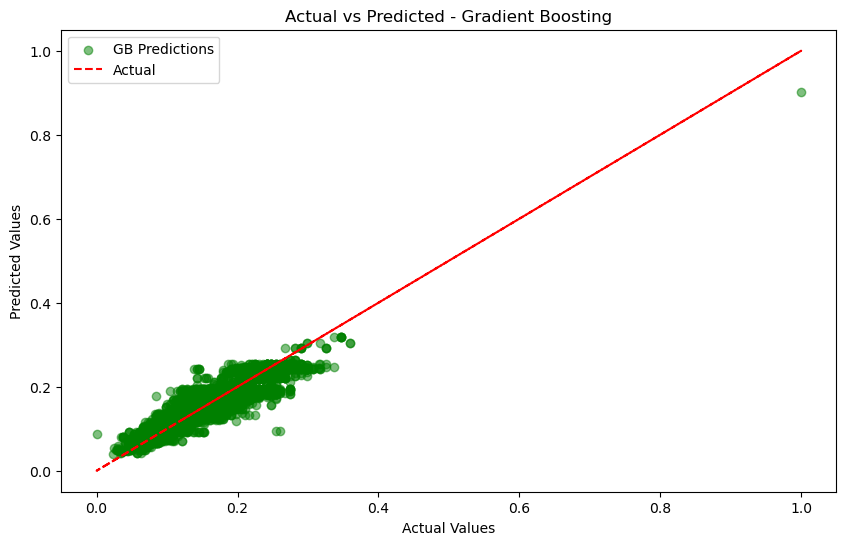

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(e_t_f_y_test, e_t_f_rf_predictions, alpha=0.5, label='RF Predictions')
plt.plot(e_t_f_y_test, e_t_f_y_test, 'r--', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Random Forest')
plt.legend()
plt.show()

# Actual vs. Predicted Plot for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(e_t_f_y_test, e_t_f_gb_predictions, alpha=0.5, label='GB Predictions', color='green')
plt.plot(e_t_f_y_test, e_t_f_y_test, 'r--', label='Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Gradient Boosting')
plt.legend()
plt.show()

Yes, engine capacity, transmission type, and fuel type can all be used to accurately forecast a vehicle's fuel efficiency, as seen by the strong R2 scores from both the Random Forest and Gradient Boosting models. These models' outstanding predictive accuracy implies that these characteristics are important predictors of fuel economy. This investigation might be useful for car makers and users who want to understand and improve vehicle fuel economy. Furthermore, such models can help regulators set requirements and the automobile industry develop more fuel-efficient vehicles.

### Can we use the model year to predict changes in emissions (CO2) and fuel efficiency over time for different vehicle models?

Random Forest - CO2 - R²: 0.9075691835995076, MSE: 305.06975004950345
Gradient Boosting - CO2 - R²: 0.8545455668155372, MSE: 480.0752530726308
Random Forest - Fuel Efficiency - R²: 0.8847238733624512, MSE: 0.00030937651369151715
Gradient Boosting - Fuel Efficiency - R²: 0.8558678596511072, MSE: 0.00038681989404658134


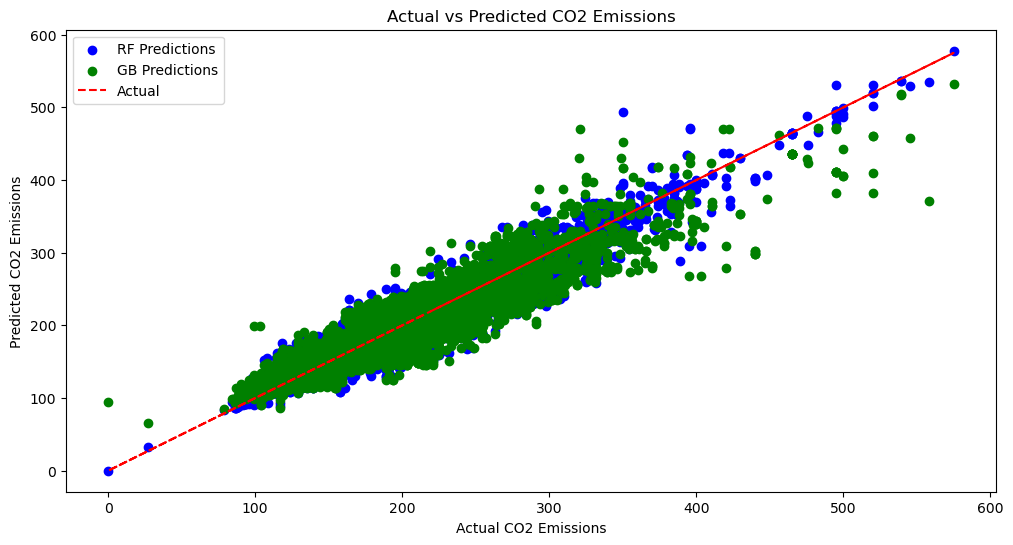

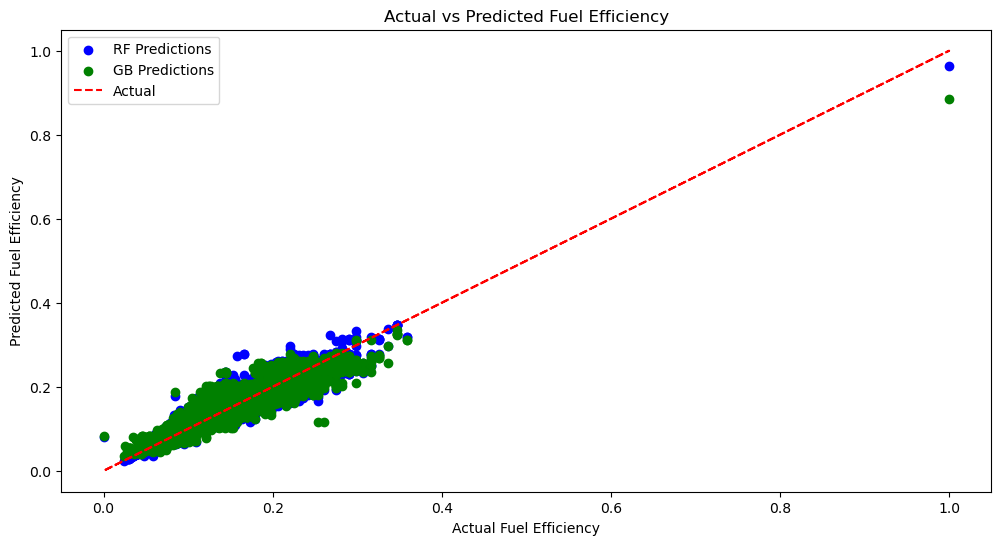

In [15]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


# Define the features and the target variables
y_e_f_e_features = ['year', 'engine_capacity', 'fuel_type', 'euro_standard']
y_e_f_e_target_co2 = 'co2'
y_e_f_e_target_fuel_efficiency = 'combined_imperial'

# Prepare the features and target
y_e_f_e_X = research_df[y_e_f_e_features]
y_e_f_e_y_co2 = research_df[y_e_f_e_target_co2]
y_e_f_e_y_fuel_efficiency = research_df[y_e_f_e_target_fuel_efficiency]

# Split the data into training and testing sets for both targets
y_e_f_e_X_train_co2, y_e_f_e_X_test_co2, y_e_f_e_y_train_co2, y_e_f_e_y_test_co2 = train_test_split(y_e_f_e_X, y_e_f_e_y_co2, test_size=0.2, random_state=42)
y_e_f_e_X_train_fe, y_e_f_e_X_test_fe, y_e_f_e_y_train_fe, y_e_f_e_y_test_fe = train_test_split(y_e_f_e_X, y_e_f_e_y_fuel_efficiency, test_size=0.2, random_state=42)

# Initialize the models
y_e_f_e_rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_e_f_e_gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the models on the training data for CO2 emissions
y_e_f_e_rf_model.fit(y_e_f_e_X_train_co2, y_e_f_e_y_train_co2)
y_e_f_e_gb_model.fit(y_e_f_e_X_train_co2, y_e_f_e_y_train_co2)

# Predict on the test data for CO2 emissions
y_e_f_e_rf_predictions_co2 = y_e_f_e_rf_model.predict(y_e_f_e_X_test_co2)
y_e_f_e_gb_predictions_co2 = y_e_f_e_gb_model.predict(y_e_f_e_X_test_co2)

# Calculate the performance metrics for CO2 emissions
y_e_f_e_rf_r2_co2 = r2_score(y_e_f_e_y_test_co2, y_e_f_e_rf_predictions_co2)
y_e_f_e_rf_mse_co2 = mean_squared_error(y_e_f_e_y_test_co2, y_e_f_e_rf_predictions_co2)
y_e_f_e_gb_r2_co2 = r2_score(y_e_f_e_y_test_co2, y_e_f_e_gb_predictions_co2)
y_e_f_e_gb_mse_co2 = mean_squared_error(y_e_f_e_y_test_co2, y_e_f_e_gb_predictions_co2)

# Output the performance metrics for CO2 emissions
print(f"Random Forest - CO2 - R²: {y_e_f_e_rf_r2_co2}, MSE: {y_e_f_e_rf_mse_co2}")
print(f"Gradient Boosting - CO2 - R²: {y_e_f_e_gb_r2_co2}, MSE: {y_e_f_e_gb_mse_co2}")

# Fit the models on the training data for fuel efficiency
y_e_f_e_rf_model.fit(y_e_f_e_X_train_fe, y_e_f_e_y_train_fe)
y_e_f_e_gb_model.fit(y_e_f_e_X_train_fe, y_e_f_e_y_train_fe)

# Predict on the test data for fuel efficiency
y_e_f_e_rf_predictions_fe = y_e_f_e_rf_model.predict(y_e_f_e_X_test_fe)
y_e_f_e_gb_predictions_fe = y_e_f_e_gb_model.predict(y_e_f_e_X_test_fe)

# Calculate the performance metrics for fuel efficiency
y_e_f_e_rf_r2_fe = r2_score(y_e_f_e_y_test_fe, y_e_f_e_rf_predictions_fe)
y_e_f_e_rf_mse_fe = mean_squared_error(y_e_f_e_y_test_fe, y_e_f_e_rf_predictions_fe)
y_e_f_e_gb_r2_fe = r2_score(y_e_f_e_y_test_fe, y_e_f_e_gb_predictions_fe)
y_e_f_e_gb_mse_fe = mean_squared_error(y_e_f_e_y_test_fe, y_e_f_e_gb_predictions_fe)

# Output the performance metrics for fuel efficiency
print(f"Random Forest - Fuel Efficiency - R²: {y_e_f_e_rf_r2_fe}, MSE: {y_e_f_e_rf_mse_fe}")
print(f"Gradient Boosting - Fuel Efficiency - R²: {y_e_f_e_gb_r2_fe}, MSE: {y_e_f_e_gb_mse_fe}")

import matplotlib.pyplot as plt
import seaborn as sns
# Visualization for CO2 Emissions Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_e_f_e_y_test_co2, y_e_f_e_rf_predictions_co2, color='blue', label='RF Predictions')
plt.scatter(y_e_f_e_y_test_co2, y_e_f_e_gb_predictions_co2, color='green', label='GB Predictions')
plt.plot(y_e_f_e_y_test_co2, y_e_f_e_y_test_co2, 'r--', label='Actual')
plt.title('Actual vs Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.legend()
plt.show()

# Visualization for Fuel Efficiency Predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_e_f_e_y_test_fe, y_e_f_e_rf_predictions_fe, color='blue', label='RF Predictions')
plt.scatter(y_e_f_e_y_test_fe, y_e_f_e_gb_predictions_fe, color='green', label='GB Predictions')
plt.plot(y_e_f_e_y_test_fe, y_e_f_e_y_test_fe, 'r--', label='Actual')
plt.title('Actual vs Predicted Fuel Efficiency')
plt.xlabel('Actual Fuel Efficiency')
plt.ylabel('Predicted Fuel Efficiency')
plt.legend()
plt.show()


The strong R2 values obtained in your study utilizing Random Forest and Gradient Boosting models to estimate CO2 emissions and fuel economy based on model year, engine capacity, fuel type, and euro standard have important consequences. These findings imply that advances in automotive technology and tougher emission requirements have had a significant impact on car emissions and fuel economy over time. The model year, in particular, appears as an important determinant, demonstrating that automobiles have gotten more environmentally friendly as technology and laws have tightened. This knowledge is priceless for regulators and automakers alike, confirming the success of pollution laws and emphasizing the significance of constant innovation in car technology. These findings back up the trend toward more fuel-efficient, lower-emission vehicles and may help guide future advances.

# Conclusion

The machine learning models developed for predicting CO2 emissions of vehicles using real-time telematics data can be utilized by the Department of Motor Vehicles (DMV) in various ways:

#### Emission Regulation Compliance: 
The DMV can use these models to monitor and ensure that vehicles comply with state and federal emission regulations. This can be done by integrating the model into vehicle inspection processes.

#### Environmental Policy Development: 
The data and insights from the models can assist in the formulation of more targeted and effective environmental policies related to vehicle emissions.

#### Informing Vehicle Registration Processes: 
The model's predictions can be used to categorize vehicles based on their emission levels, which can influence registration fees or tax incentives for low-emission vehicles.

#### Public Awareness and Education: 
The DMV can use the information to educate the public about the environmental impact of their vehicles, promoting more eco-friendly driving habits and vehicle choices.

By leveraging the predictive power of the models, the DMV can play a critical role in environmental conservation and public health protection